In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

%matplotlib inline
import seaborn as sns
import geopandas as gpd
sns.set_theme()
pd.set_option('display.max_columns', None)

# Importation des données

## Données #1: Tranches d âges + Genres + Catégorie professionnelle

In [8]:
df_pop = pd.read_excel('/Users/chmilew/Documents/Python Projects/Entretien Saint Gobain/telechargement/base-cc-evol-struct-pop-2013 2.xls', skiprows = 4,engine='xlrd')

In [9]:
df_pop.head()

Code géographique Région Région 2016 Département     Libellé géographique  \
0            CODGEO    REG     REG2016         DEP                   LIBGEO   
1             01001     82          84          01  L'Abergement-Clémenciat   
2             01002     82          84          01    L'Abergement-de-Varey   
3             01004     82          84          01        Ambérieu-en-Bugey   
4             01005     82          84          01      Ambérieux-en-Dombes   

  Population en 2013 (princ) Pop 0-14 ans en 2013 (princ)  \
0                    P13_POP                  P13_POP0014   
1                        767                   176.016667   
2                        236                    44.376068   
3                      14359                  3049.353947   
4                     1635.0                   337.300803   

  Pop 15-29 ans en 2013 (princ) Pop 30-44 ans en 2013 (princ)  \
0                   P13_POP1529                   P13_POP3044   
1                     95.383333                    163.233333   
2                     35.299145                     60.512821   
3                   2857.742493                    2771.06648   
4                    252.470661                    324.172329   

  Pop 45-59 ans en 2013 (princ) Pop 60-74 ans en 2013 (princ)  \
0                   P13_POP4559                   P13_POP6074   
1                    149.466667                    125.866667   
2                     38.324786                     36.307692   
3                   2660.372622                   1794.587696   
4                    377.696109                    233.282891   

  Pop 75-89 ans en 2013 (princ) Pop 90 ans ou plus en 2013 (princ)  \
0                   P13_POP7589                         P13_POP90P   
1                     54.083333                               2.95   
2                     19.162393                           2.017094   
3                   1084.592221                         141.284541   
4                     99.978382                          10.098826   

  Pop Hommes en 2013 (princ) Pop Hommes 0-14 ans en 2013 (princ)  \
0                   P13_POPH                           P13_H0014   
1                      389.4                               91.45   
2                 125.059829                           25.213675   
3                6875.747076                         1444.521055   
4                 824.064237                          172.689932   

  Pop Hommes 15-29 ans en 2013 (princ) Pop Hommes 30-44 ans en 2013 (princ)  \
0                            P13_H1529                            P13_H3044   
1                            52.116667                            84.566667   
2                            17.145299                            34.290598   
3                          1407.752366                          1414.240634   
4                           133.304509                           146.432983   

  Pop Hommes 45-59 ans en 2013 (princ) Pop Hommes 60-74 ans en 2013 (princ)  \
0                            P13_H4559                            P13_H6074   
1                                73.75                                 64.9   
2                            16.136752                            22.188034   
3                          1318.511558                           859.271422   
4                           198.946881                           121.185917   

  Pop Hommes 75-89 ans en 2013 (princ)  \
0                            P13_H7589   
1                            22.616667   
2                             9.076923   
3                           368.958261   
4                            48.474367   

  Pop Hommes 90 ans ou plus en 2013 (princ)  \
0                                  P13_H90P   
1                                         0   
2                                  1.008547   
3                                 62.491781   
4                                  3.029648   

  Pop Hommes 0-19 ans en 2013  (princ) Pop Hommes 20-64 ans en

#### On supprime la première ligne

In [10]:
df_pop = df_pop.drop(0).reset_index(drop=True)

In [11]:
df_pop.head()

Code géographique Région Région 2016 Département     Libellé géographique  \
0             01001     82          84          01  L'Abergement-Clémenciat   
1             01002     82          84          01    L'Abergement-de-Varey   
2             01004     82          84          01        Ambérieu-en-Bugey   
3             01005     82          84          01      Ambérieux-en-Dombes   
4             01006     82          84          01                  Ambléon   

  Population en 2013 (princ) Pop 0-14 ans en 2013 (princ)  \
0                        767                   176.016667   
1                        236                    44.376068   
2                      14359                  3049.353947   
3                     1635.0                   337.300803   
4                        108                    11.571429   

  Pop 15-29 ans en 2013 (princ) Pop 30-44 ans en 2013 (princ)  \
0                     95.383333                    163.233333   
1                     35.299145                     60.512821   
2                   2857.742493                    2771.06648   
3                    252.470661                    324.172329   
4                     17.357143                     23.142857   

  Pop 45-59 ans en 2013 (princ) Pop 60-74 ans en 2013 (princ)  \
0                    149.466667                    125.866667   
1                     38.324786                     36.307692   
2                   2660.372622                   1794.587696   
3                    377.696109                    233.282891   
4                     26.035714                     19.285714   

  Pop 75-89 ans en 2013 (princ) Pop 90 ans ou plus en 2013 (princ)  \
0                     54.083333                               2.95   
1                     19.162393                           2.017094   
2                   1084.592221                         141.284541   
3                     99.978382                          10.098826   
4                      9.642857                           0.964286   

  Pop Hommes en 2013 (princ) Pop Hommes 0-14 ans en 2013 (princ)  \
0                      389.4                               91.45   
1                 125.059829                           25.213675   
2                6875.747076                         1444.521055   
3                 824.064237                          172.689932   
4                  55.928571                                6.75   

  Pop Hommes 15-29 ans en 2013 (princ) Pop Hommes 30-44 ans en 2013 (princ)  \
0                            52.116667                            84.566667   
1                            17.145299                            34.290598   
2                          1407.752366                          1414.240634   
3                           133.304509                           146.432983   
4                             9.642857                                 13.5   

  Pop Hommes 45-59 ans en 2013 (princ) Pop Hommes 60-74 ans en 2013 (princ)  \
0                                73.75                                 64.9   
1                            16.136752                            22.188034   
2                          1318.511558                           859.271422   
3                           198.946881                           121.185917   
4                                 13.5                             8.678571   

  Pop Hommes 75-89 ans en 2013 (princ)  \
0                            22.616667   
1                             9.076923   
2                           368.958261   
3                            48.474367   
4                             3.857143   

  Pop Hommes 90 ans ou plus en 2013 (princ)  \
0                                         0   
1                                  1.008547   
2                                 62.491781   
3                                  3.029648   
4                                         0   

  Pop Hommes 0-19 ans en 2013  (princ) Pop Hommes 20-64 ans en

#### Suppression des colonnes liées au code géo, à la région ainsi que toutes les données liées au passif (habitant auparavant à..)

In [12]:
columns_to_drop = df_pop.columns[0:3].tolist() + df_pop.columns[35:55].tolist()
df_pop = df_pop.drop(columns_to_drop, axis=1)

In [13]:
df_pop.head()

Département     Libellé géographique Population en 2013 (princ)  \
0          01  L'Abergement-Clémenciat                        767   
1          01    L'Abergement-de-Varey                        236   
2          01        Ambérieu-en-Bugey                      14359   
3          01      Ambérieux-en-Dombes                     1635.0   
4          01                  Ambléon                        108   

  Pop 0-14 ans en 2013 (princ) Pop 15-29 ans en 2013 (princ)  \
0                   176.016667                     95.383333   
1                    44.376068                     35.299145   
2                  3049.353947                   2857.742493   
3                   337.300803                    252.470661   
4                    11.571429                     17.357143   

  Pop 30-44 ans en 2013 (princ) Pop 45-59 ans en 2013 (princ)  \
0                    163.233333                    149.466667   
1                     60.512821                     38.324786   
2                    2771.06648                   2660.372622   
3                    324.172329                    377.696109   
4                     23.142857                     26.035714   

  Pop 60-74 ans en 2013 (princ) Pop 75-89 ans en 2013 (princ)  \
0                    125.866667                     54.083333   
1                     36.307692                     19.162393   
2                   1794.587696                   1084.592221   
3                    233.282891                     99.978382   
4                     19.285714                      9.642857   

  Pop 90 ans ou plus en 2013 (princ) Pop Hommes en 2013 (princ)  \
0                               2.95                      389.4   
1                           2.017094                 125.059829   
2                         141.284541                6875.747076   
3                          10.098826                 824.064237   
4                           0.964286                  55.928571   

  Pop Hommes 0-14 ans en 2013 (princ) Pop Hommes 15-29 ans en 2013 (princ)  \
0                               91.45                            52.116667   
1                           25.213675                            17.145299   
2                         1444.521055                          1407.752366   
3                          172.689932                           133.304509   
4                                6.75                             9.642857   

  Pop Hommes 30-44 ans en 2013 (princ) Pop Hommes 45-59 ans en 2013 (princ)  \
0                            84.566667                                73.75   
1                            34.290598                            16.136752   
2                          1414.240634                          1318.511558   
3                           146.432983                           198.946881   
4                                 13.5                                 13.5   

  Pop Hommes 60-74 ans en 2013 (princ) Pop Hommes 75-89 ans en 2013 (princ)  \
0                                 64.9                            22.616667   
1                            22.188034                             9.076923   
2                           859.271422                           368.958261   
3                           121.185917                            48.474367   
4                             8.678571                             3.857143   

  Pop Hommes 90 ans ou plus en 2013 (princ)  \
0                                         0   
1                                  1.008547   
2                                 62.491781   
3                                  3.029648   
4                                         0   

  Pop Hommes 0-19 ans en 2013  (princ) Pop Hommes 20-64 ans en 2013 (princ)  \
0                           113.083333                                218.3   
1                            28.239316                            73.623932   
2                          1865.879147                          4077.252015   

In [15]:
df_pop = df_pop.drop(['Libellé géographique'], axis = 1)

In [16]:
df_pop_dropped['Département'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '971', '972',
       '973', '974'], dtype=object)

#### Suppression des départements hors France Métropolitaine

In [17]:
# List of values to exclude
values_to_exclude = ['971', '972','973', '974']

# Create a boolean mask to filter out undesired values
mask = ~df_pop['Département'].isin(values_to_exclude)

# Apply the mask to the DataFrame
df_pop = df_pop[mask]

In [18]:
df_pop['Département'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95'], dtype=object)

#### On renomme la colonne 'Département' en 'Code du département'

In [19]:
df_pop = df_pop.rename(columns={'Département': 'Code du département'})

In [20]:
df_pop.head()

Code du département Population en 2013 (princ) Pop 0-14 ans en 2013 (princ)  \
0                  01                        767                   176.016667   
1                  01                        236                    44.376068   
2                  01                      14359                  3049.353947   
3                  01                     1635.0                   337.300803   
4                  01                        108                    11.571429   

  Pop 15-29 ans en 2013 (princ) Pop 30-44 ans en 2013 (princ)  \
0                     95.383333                    163.233333   
1                     35.299145                     60.512821   
2                   2857.742493                    2771.06648   
3                    252.470661                    324.172329   
4                     17.357143                     23.142857   

  Pop 45-59 ans en 2013 (princ) Pop 60-74 ans en 2013 (princ)  \
0                    149.466667                    125.866667   
1                     38.324786                     36.307692   
2                   2660.372622                   1794.587696   
3                    377.696109                    233.282891   
4                     26.035714                     19.285714   

  Pop 75-89 ans en 2013 (princ) Pop 90 ans ou plus en 2013 (princ)  \
0                     54.083333                               2.95   
1                     19.162393                           2.017094   
2                   1084.592221                         141.284541   
3                     99.978382                          10.098826   
4                      9.642857                           0.964286   

  Pop Hommes en 2013 (princ) Pop Hommes 0-14 ans en 2013 (princ)  \
0                      389.4                               91.45   
1                 125.059829                           25.213675   
2                6875.747076                         1444.521055   
3                 824.064237                          172.689932   
4                  55.928571                                6.75   

  Pop Hommes 15-29 ans en 2013 (princ) Pop Hommes 30-44 ans en 2013 (princ)  \
0                            52.116667                            84.566667   
1                            17.145299                            34.290598   
2                          1407.752366                          1414.240634   
3                           133.304509                           146.432983   
4                             9.642857                                 13.5   

  Pop Hommes 45-59 ans en 2013 (princ) Pop Hommes 60-74 ans en 2013 (princ)  \
0                                73.75                                 64.9   
1                            16.136752                            22.188034   
2                          1318.511558                           859.271422   
3                           198.946881                           121.185917   
4                                 13.5                             8.678571   

  Pop Hommes 75-89 ans en 2013 (princ)  \
0                            22.616667   
1                             9.076923   
2                           368.958261   
3                            48.474367   
4                             3.857143   

  Pop Hommes 90 ans ou plus en 2013 (princ)  \
0                                         0   
1                                  1.008547   
2                                 62.491781   
3                                  3.029648   
4                                         0   

  Pop Hommes 0-19 ans en 2013  (princ) Pop Hommes 20-64 ans en 2013 (princ)  \
0                           113.083333                                218.3   
1                            28.239316                            73.623932   
2                          1865.879147                          4077.252015   
3                            225.20383                           475.654725   
4                     

#### On groupe par département et on somme, car on va se focaliser sur les comportements par département et non par commune

In [21]:
df_pop = df_pop.groupby('Code du département').sum().reset_index()

In [22]:
df_pop.head()

Code du département  Population en 2013 (princ)  \
0                  01                    619497.0   
1                  02                    540067.0   
2                  03                    343431.0   
3                  04                    161916.0   
4                  05                    139279.0   

   Pop 0-14 ans en 2013 (princ)  Pop 15-29 ans en 2013 (princ)  \
0                 126807.247923                  102445.232502   
1                 105250.652968                   91610.957066   
2                  54314.328116                   48953.221443   
3                  26994.635391                   22868.616157   
4                  24030.261001                   20171.943907   

   Pop 30-44 ans en 2013 (princ)  Pop 45-59 ans en 2013 (princ)  \
0                  129043.456981                  127098.542444   
1                  101156.084062                  111153.507696   
2                   58475.536654                   71825.094027   
3                   27860.138094                   34751.156987   
4                   25840.234057                   29752.378282   

   Pop 60-74 ans en 2013 (princ)  Pop 75-89 ans en 2013 (princ)  \
0                   85813.989295                   42916.541249   
1                   81594.286468                   44736.651587   
2                   64411.901838                   40435.668994   
3                   30617.946969                   16772.066694   
4                   24137.636653                   13354.586834   

   Pop 90 ans ou plus en 2013 (princ)  Pop Hommes en 2013 (princ)  \
0                         5371.989607               306279.915417   
1                         4564.860153               262925.007676   
2                         5015.248928               164544.581601   
3                         2051.439709                78548.704642   
4                         1991.959268                68026.930170   

   Pop Hommes 0-14 ans en 2013 (princ)  Pop Hommes 15-29 ans en 2013 (princ)  \
0                         64748.359109                          52405.946073   
1                         53855.492083                          46538.706707   
2                         27674.651236                          25082.745042   
3                         13871.165596                          11743.569818   
4                         12192.018370                          10504.960880   

   Pop Hommes 30-44 ans en 2013 (princ)  Pop Hommes 45-59 ans en 2013 (princ)  \
0                          64586.762759                          63557.404018   
1                          50324.252758                          55151.594185   
2                          28937.490976                          35299.737245   
3                          13564.901393                          17032.952449   
4                          12711.000669                          14773.958165   

   Pop Hommes 60-74 ans en 2013 (princ)  Pop Hommes 75-89 ans en 2013 (princ)  \
0                          42147.971124                          17348.948707   
1                          39170.043062                          16789.092952   
2                          30600.485784                          15655.188887   
3                          14727.528883                           7070.697916   
4                          11767.389736                           5503.916319   

   Pop Hommes 90 ans ou plus en 2013 (princ)  \
0                                1484.523627   
1                                1095.825928   
2                                1294.282432   
3                                 537.888587   
4                                 573.686032   

   Pop Hommes 0-19 ans en 2013  (princ)  Pop Hommes 20-64 ans en 2013 (princ)  \
0                          83806.935662                         179755.877142   
1                          70790.083164                         153256.559659   
2                          37040.259296                          92643.910428 

## Données #2: Pauvreté + Ménages

In [23]:
df_rev = pd.read_excel('/Users/chmilew/Documents/Python Projects/Entretien Saint Gobain/telechargement/filo-revenu-pauvrete-menage-2013.xls',skiprows = 4,sheet_name = "DEP",engine='xlrd')

In [24]:
df_rev.head()

Code géographique     Libellé géographique Nombre de ménages fiscaux  \
0            CODGEO                   LIBGEO               NBMENFISC13   
1                01                      Ain                    245638   
2                02                    Aisne                    222055   
3                03                   Allier                    157993   
4                04  Alpes-de-Haute-Provence                     71306   

  Nombre de personnes dans les ménages fiscaux Médiane du niveau vie  \
0                              NBPERSMENFISC13                 MED13   
1                                       601507          21489.666667   
2                                       529674                 18300   
3                                       333536          18966.190476   
4                                     154509.5          19003.333333   

  Part des ménages fiscaux imposés Taux de pauvreté-Ensemble  \
0                           PIMP13                    TP6013   
1                             60.2                      10.6   
2                             50.7                      18.6   
3                             51.4                        15   
4                               53                      16.5   

  Taux de pauvreté-moins de 30 ans Taux de pauvreté-30 à 39 ans   \
0                       TP60AGE113                    TP60AGE213   
1                             15.5                          11.7   
2                             32.1                          23.3   
3                             25.7                          18.6   
4                             26.3                          19.7   

  Taux de pauvreté-40 à 49 ans Taux de pauvreté-50 à 59 ans  \
0                   TP60AGE313                   TP60AGE413   
1                         11.8                         10.2   
2                         22.6                         17.3   
3                         19.2                         14.9   
4                         20.2                         16.2   

  Taux de pauvreté-60 à 74 ans Taux de pauvreté-75 ans ou plus  \
0                   TP60AGE513                      TP60AGE613   
1                          7.4                             7.1   
2                          9.4                             8.2   
3                          8.5                             9.1   
4                           11                            11.8   

  Taux de pauvreté-propriétaires Taux de pauvreté-locataires  \
0                     TP60TOL113                  TP60TOL213   
1                            5.6                        20.8   
2                            8.9                        35.6   
3                            8.4                        28.9   
4                            9.6                        27.4   

  Part des revenus d'activité dont part des salaires, traitements ou chômage  \
0                       PRA13                                        PTSAC13   
1                        77.8                                           73.4   
2                        69.4                                           61.7   
3                        60.6                                           54.3   
4                        62.2                                           55.3   

  dont part des revenus d'activités non salariées  \
0                                          PBEN13   
1                                             4.4   
2                                             7.7   
3                                             6.3   
4                                             6.9   

  Part des pensions, retraites et rentes  \
0                                 PPEN13   
1                                   24.1   
2                                   29.3   
3                                   36.1   
4                                   35.7   

  Part des revenus du patrimoine et autres revenus  \
0                                           PPAT13

#### On réitère exactement les mêmes étapes que pour Données #1

In [25]:
df_rev = df_rev.drop(0).reset_index(drop=True)

#### Suppression de quelques colonnes moins intéressantes

In [26]:
df_rev.columns[-13:].tolist()

["Part des revenus d'activité",
 'dont part des salaires, traitements ou chômage',
 "dont part des revenus d'activités non salariées",
 'Part des pensions, retraites et rentes',
 'Part des revenus du patrimoine et autres revenus',
 "Part de l'ensemble des prestations sociales",
 'dont part des prestations familiales',
 'dont part des minima sociaux',
 'dont part des prestations logement',
 'Part des impôts',
 'Rapport inter-décile 9e décile/1er decile',
 '1er décile du niveau de vie',
 '9e décile du niveau de vie']

In [27]:
df_rev = df_rev.drop(df_rev.columns[-13:].tolist(), axis=1)

In [29]:
df_rev.head()

Code géographique     Libellé géographique Nombre de ménages fiscaux  \
0                01                      Ain                    245638   
1                02                    Aisne                    222055   
2                03                   Allier                    157993   
3                04  Alpes-de-Haute-Provence                     71306   
4                05             Hautes-Alpes                     62507   

  Nombre de personnes dans les ménages fiscaux Médiane du niveau vie  \
0                                       601507          21489.666667   
1                                       529674                 18300   
2                                       333536          18966.190476   
3                                     154509.5          19003.333333   
4                                       135756                 19199   

  Part des ménages fiscaux imposés Taux de pauvreté-Ensemble  \
0                             60.2                      10.6   
1                             50.7                      18.6   
2                             51.4                        15   
3                               53                      16.5   
4                             55.3                      14.1   

  Taux de pauvreté-moins de 30 ans Taux de pauvreté-30 à 39 ans   \
0                             15.5                          11.7   
1                             32.1                          23.3   
2                             25.7                          18.6   
3                             26.3                          19.7   
4                             20.3                          16.5   

  Taux de pauvreté-40 à 49 ans Taux de pauvreté-50 à 59 ans  \
0                         11.8                         10.2   
1                         22.6                         17.3   
2                         19.2                         14.9   
3                         20.2                         16.2   
4                           17                         14.2   

  Taux de pauvreté-60 à 74 ans Taux de pauvreté-75 ans ou plus  \
0                          7.4                             7.1   
1                          9.4                             8.2   
2                          8.5                             9.1   
3                           11                            11.8   
4                          8.6                            10.8   

  Taux de pauvreté-propriétaires Taux de pauvreté-locataires  
0                            5.6                        20.8  
1                            8.9                        35.6  
2                            8.4                        28.9  
3                            9.6                        27.4  
4                            8.5                        23.3

In [30]:
df_rev = df_rev.drop(['Libellé géographique'],axis = 1)
df_rev = df_rev.rename(columns={'Code géographique': 'Code du département'})

In [31]:
df_rev.head()

Code du département Nombre de ménages fiscaux  \
0                  01                    245638   
1                  02                    222055   
2                  03                    157993   
3                  04                     71306   
4                  05                     62507   

  Nombre de personnes dans les ménages fiscaux Médiane du niveau vie  \
0                                       601507          21489.666667   
1                                       529674                 18300   
2                                       333536          18966.190476   
3                                     154509.5          19003.333333   
4                                       135756                 19199   

  Part des ménages fiscaux imposés Taux de pauvreté-Ensemble  \
0                             60.2                      10.6   
1                             50.7                      18.6   
2                             51.4                        15   
3                               53                      16.5   
4                             55.3                      14.1   

  Taux de pauvreté-moins de 30 ans Taux de pauvreté-30 à 39 ans   \
0                             15.5                          11.7   
1                             32.1                          23.3   
2                             25.7                          18.6   
3                             26.3                          19.7   
4                             20.3                          16.5   

  Taux de pauvreté-40 à 49 ans Taux de pauvreté-50 à 59 ans  \
0                         11.8                         10.2   
1                         22.6                         17.3   
2                         19.2                         14.9   
3                         20.2                         16.2   
4                           17                         14.2   

  Taux de pauvreté-60 à 74 ans Taux de pauvreté-75 ans ou plus  \
0                          7.4                             7.1   
1                          9.4                             8.2   
2                          8.5                             9.1   
3                           11                            11.8   
4                          8.6                            10.8   

  Taux de pauvreté-propriétaires Taux de pauvreté-locataires  
0                            5.6                        20.8  
1                            8.9                        35.6  
2                            8.4                        28.9  
3                            9.6                        27.4  
4                            8.5                        23.3

## Données #3: Scolarité, niveau d'études

In [32]:
df_scol = pd.read_excel('/Users/chmilew/Documents/Python Projects/Entretien Saint Gobain/telechargement/base-ic-diplomes-formation-2013.xls',skiprows = 4,engine='xlrd')

In [33]:
df_scol.head()

IRIS Région Région 2016 Département Unité urbaine Commune ou ARM  \
0       IRIS    REG     REG2016         DEP        UU2010            COM   
1  010010000     82          84          01         01000          01001   
2  010020000     82          84          01         01000          01002   
3  010040101     82          84          01         01302          01004   
4  010040102     82          84          01         01302          01004   

    Libellé commune ou ARM  TRIRIS Grand quartier  \
0                   LIBCOM  TRIRIS      GRD_QUART   
1  L'Abergement-Clémenciat  ZZZZZZ        0100100   
2    L'Abergement-de-Varey  ZZZZZZ        0100200   
3        Ambérieu-en-Bugey  ZZZZZZ        0100401   
4        Ambérieu-en-Bugey  ZZZZZZ        0100401   

                              Libellé de l'IRIS Type d'IRIS  \
0                                       LIBIRIS    TYP_IRIS   
1  L'Abergement-Clémenciat (commune non irisée)           Z   
2    L'Abergement-de-Varey (commune non irisée)           Z   
3              Les Perouses-Triangle d'Activite           H   
4                                 Longeray-Gare           H   

  Modification de l'IRIS Label de l'IRIS Pop 2-5 ans en 2013 (princ)  \
0             MODIF_IRIS        LAB_IRIS                 P13_POP0205   
1                     00               5                       50.15   
2                     00               5                   13.111111   
3                     00               1                   97.229838   
4                     00               1                  251.252773   

  Pop 6-10 ans en 2013 (princ) Pop 11-14 ans en 2013 (princ)  \
0                  P13_POP0610                   P13_POP1114   
1                    57.033333                     48.183333   
2                    21.179487                      7.059829   
3                   108.453277                     74.675155   
4                   241.028911                     220.33506   

  Pop 15-17 ans en 2013 (princ) Pop 18-24 ans en 2013 (princ)  \
0                   P13_POP1517                   P13_POP1824   
1                          29.5                     36.383333   
2                      5.042735                     13.111111   
3                     76.723808                    232.924416   
4                     125.83727                    422.300795   

  Pop 25-29 ans en 2013 (princ) Pop 30 ans ou plus en 2013 (princ)  \
0                   P13_POP2529                         P13_POP30P   
1                          29.5                              495.6   
2                     17.145299                         156.324786   
3                    149.967281                        1129.670362   
4                    342.949544                        2062.534652   

  Pop scolarisée 2-5 ans en 2013 (princ)  \
0                           P13_SCOL0205   
1                                   35.4   
2                               10.08547   
3                              73.178135   
4                             152.342969   

  Pop scolarisée 6-10 ans en 2013 (princ)  \
0                            P13_SCOL0610   
1                                   56.05   
2                               21.179487   
3                              106.565922   
4                              238.937088   

  Pop scolarisée 11-14 ans en 2013 (princ)  \
0                             P13_SCOL1114   
1                                48.183333   
2                                 7.059829   
3                                74.675155   
4                               198.347049   

  Pop scolarisée 15-17 ans en 2013 (princ)  \
0                             P13_SCOL1517   
1                                     29.5   
2                                 4.034188   
3                                69.256936   
4                               115.146263   

  Pop scolarisée 18-24 ans en 2013 (princ)  \
0                             P13_SCOL1824   
1                                16.71666

#### On réitère les mêmes étapes avec suppression de IRIS, Région, Unité urbaine...

In [34]:
df_scol = df_scol.drop(0).reset_index(drop=True)

In [35]:
columns_to_drop = df_scol.columns[0:3].tolist() + df_scol.columns[4:24].tolist()
df_scol = df_scol.drop(columns_to_drop, axis=1)

In [36]:
df_scol.head()

Département Pop scolarisée 18-24 ans en 2013 (princ)  \
0          01                                16.716667   
1          01                                 4.034188   
2          01                               130.512047   
3          01                               116.915925   
4          01                               114.177143   

  Pop scolarisée 25-29 ans en 2013 (princ)  \
0                                        0   
1                                        0   
2                                13.294277   
3                                17.567636   
4                                  7.36388   

  Pop scolarisée 30 ans ou plus en 2013 (princ)  \
0                                      1.966667   
1                                      3.025641   
2                                        5.9964   
3                                     28.452357   
4                                     35.141328   

  Pop 15 ans ou plus non scolarisée en 2013 (princ)  \
0                                             542.8   
1                                        180.529915   
2                                       1370.226207   
3                                        2675.54008   
4                                       2844.154477   

  Pop 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ)  \
0                                             179.95                                            
1                                          34.290598                                            
2                                         541.085646                                            
3                                         987.968155                                            
4                                        1017.070449                                            

  Pop 15 ans ou plus non scol. CAP-BEP en 2013 (princ)  \
0                                         137.666667     
1                                           40.34188     
2                                         328.309067     
3                                         741.818824     
4                                         721.390046     

  Pop 15 ans ou plus non scol. BAC en 2013 (princ)  \
0                                            91.45   
1                                        33.282051   
2                                       257.686678   
3                                       503.947792   
4                                         493.5577   

  Pop 15 ans ou plus non scol. Enseignement sup en 2013 (princ)  \
0                                         133.733333              
1                                          72.615385              
2                                         243.144815              
3                                         441.805309              
4                                         612.136283              

  Hommes 15 ans ou plus non scolarisés en 2013 (princ)  \
0                                         273.366667     
1                                          93.794872     
2                                          709.87242     
3                                        1290.925298     
4                                        1251.490771     

  Hommes 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ)  \
0                                              85.55                                               
1                                           10.08547                                               
2                                         262.999912                                               
3                                         422.211836                                               
4                                         320.269615                                               

  Hommes 15 ans ou plus non scol. CAP-BEP en 2013 (princ)  \
0                                          78.666667        
1     

In [37]:
df_scol['Département'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '971', '972',
       '973', '974'], dtype=object)

#### Suppréssion des départements hors France Métropolitaine

In [39]:
# List of values to exclude
values_to_exclude = ['971', '972','973', '974']

# Create a boolean mask to filter out undesired values
mask = ~df_scol['Département'].isin(values_to_exclude)

# Apply the mask to the DataFrame
df_scol = df_scol[mask]

In [40]:
df_scol['Département'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95'], dtype=object)

In [41]:
df_scol = df_scol.rename(columns={'Département': 'Code du département'})

In [42]:
df_scol.head()

Code du département Pop scolarisée 18-24 ans en 2013 (princ)  \
0                  01                                16.716667   
1                  01                                 4.034188   
2                  01                               130.512047   
3                  01                               116.915925   
4                  01                               114.177143   

  Pop scolarisée 25-29 ans en 2013 (princ)  \
0                                        0   
1                                        0   
2                                13.294277   
3                                17.567636   
4                                  7.36388   

  Pop scolarisée 30 ans ou plus en 2013 (princ)  \
0                                      1.966667   
1                                      3.025641   
2                                        5.9964   
3                                     28.452357   
4                                     35.141328   

  Pop 15 ans ou plus non scolarisée en 2013 (princ)  \
0                                             542.8   
1                                        180.529915   
2                                       1370.226207   
3                                        2675.54008   
4                                       2844.154477   

  Pop 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ)  \
0                                             179.95                                            
1                                          34.290598                                            
2                                         541.085646                                            
3                                         987.968155                                            
4                                        1017.070449                                            

  Pop 15 ans ou plus non scol. CAP-BEP en 2013 (princ)  \
0                                         137.666667     
1                                           40.34188     
2                                         328.309067     
3                                         741.818824     
4                                         721.390046     

  Pop 15 ans ou plus non scol. BAC en 2013 (princ)  \
0                                            91.45   
1                                        33.282051   
2                                       257.686678   
3                                       503.947792   
4                                         493.5577   

  Pop 15 ans ou plus non scol. Enseignement sup en 2013 (princ)  \
0                                         133.733333              
1                                          72.615385              
2                                         243.144815              
3                                         441.805309              
4                                         612.136283              

  Hommes 15 ans ou plus non scolarisés en 2013 (princ)  \
0                                         273.366667     
1                                          93.794872     
2                                          709.87242     
3                                        1290.925298     
4                                        1251.490771     

  Hommes 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ)  \
0                                              85.55                                               
1                                           10.08547                                               
2                                         262.999912                                               
3                                         422.211836                                               
4                                         320.269615                                               

  Hommes 15 ans ou plus non scol. CAP-BEP en 2013 (princ)  \
0                  

In [43]:
df_scol = df_scol.groupby('Code du département').sum().reset_index()

In [44]:
df_scol.head()

Code du département  Pop scolarisée 18-24 ans en 2013 (princ)  \
0                  01                              17259.694420   
1                  02                              14586.667862   
2                  03                               9159.657936   
3                  04                               3751.457333   
4                  05                               3042.317223   

   Pop scolarisée 25-29 ans en 2013 (princ)  \
0                               1348.274373   
1                                859.683998   
2                                662.337963   
3                                314.514345   
4                                239.939100   

   Pop scolarisée 30 ans ou plus en 2013 (princ)  \
0                                    2850.016677   
1                                    1832.454373   
2                                    1230.931741   
3                                     888.560896   
4                                     763.370293   

   Pop 15 ans ou plus non scolarisée en 2013 (princ)  \
0                                      447492.910305   
1                                      398031.267414   
2                                      267332.612123   
3                                      124540.954523   
4                                      106298.436289   

   Pop 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ)  \
0                                      134987.612043                                             
1                                      163461.139007                                             
2                                      100674.770258                                             
3                                       40322.120876                                             
4                                       31365.977227                                             

   Pop 15 ans ou plus non scol. CAP-BEP en 2013 (princ)  \
0                                      118627.395670      
1                                      107501.334612      
2                                       75632.887612      
3                                       32301.144489      
4                                       26345.986859      

   Pop 15 ans ou plus non scol. BAC en 2013 (princ)  \
0                                      76724.986484   
1                                      59431.190484   
2                                      42069.693631   
3                                      21838.699908   
4                                      20258.394300   

   Pop 15 ans ou plus non scol. Enseignement sup en 2013 (princ)  \
0                                      117152.916108               
1                                       67637.603311               
2                                       48955.260622               
3                                       30078.989250               
4                                       28328.077903               

   Hommes 15 ans ou plus non scolarisés en 2013 (princ)  \
0                                      219335.728853      
1                                      190663.190778      
2                                      125829.484167      
3                                       59432.627094      
4                                       51316.364320      

   Hommes 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ)  \
0                                       58919.404234                                                
1                                       69589.086713                                                
2                                       40902.652264                                                
3                                       17365.164441                                                
4                                       13868.730675                                                

   Hommes 15 ans ou 

## Données #4: Referendum

In [45]:
df = pd.read_csv('/Users/chmilew/Documents/Python Projects/Entretien Saint Gobain/Referendum.csv', on_bad_lines='skip',sep=";")

In [46]:
df.head()

Code du département Libellé du département  Code de la commune  \
0                   1                    AIN                   1   
1                   1                    AIN                   2   
2                   1                    AIN                   4   
3                   1                    AIN                   5   
4                   1                    AIN                   6   

     Libellé de la commune  Inscrits  Abstentions  Blancs et nuls  Choix A  \
0  L'Abergement-Clémenciat       592           84               9      154   
1    L'Abergement-de-Varey       215           36               5       66   
2        Ambérieu-en-Bugey      8205         1698             126     2717   
3      Ambérieux-en-Dombes      1152          170              18      280   
4                  Ambléon       105           17               1       35   

   Choix B  
0      345  
1      108  
2     3664  
3      684  
4       52

#### Rajout d'un zéro pour les 9 premiers départements pour homogénéiser le Code du département avec les autres données

In [47]:
df['Code du département'] = df['Code du département'].apply(lambda x: x.zfill(2) if x.isnumeric() and int(x) < 10 else x)


In [48]:
df['Code du département'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC',
       'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ'], dtype=object)

#### Suppréssion des départements hors France Métropolitaine

In [49]:
# List of values to exclude
values_to_exclude = ['ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ']

# Create a boolean mask to filter out undesired values
mask = ~df['Code du département'].isin(values_to_exclude)

# Apply the mask to the DataFrame
df = df[mask]

In [67]:
df.head()

Code du département Libellé du département  Code de la commune  \
0                  01                    AIN                   1   
1                  01                    AIN                   2   
2                  01                    AIN                   4   
3                  01                    AIN                   5   
4                  01                    AIN                   6   

     Libellé de la commune  Inscrits  Abstentions  Blancs et nuls  Choix A  \
0  L'Abergement-Clémenciat       592           84               9      154   
1    L'Abergement-de-Varey       215           36               5       66   
2        Ambérieu-en-Bugey      8205         1698             126     2717   
3      Ambérieux-en-Dombes      1152          170              18      280   
4                  Ambléon       105           17               1       35   

   Choix B  
0      345  
1      108  
2     3664  
3      684  
4       52

In [50]:
df = df.groupby('Code du département').agg({
    'Inscrits': 'sum',
    'Abstentions': 'sum',
    'Blancs et nuls': 'sum',
    'Choix A': 'sum',
    'Choix B': 'sum'
}).reset_index()

In [51]:
df.head()

Code du département  Inscrits  Abstentions  Blancs et nuls  Choix A  Choix B
0                  01    393808        65996            6453   116379   204980
1                  02    376068        72928            5196   120916   177028
2                  03    256275        45266            5059    96398   109552
3                  04    123933        21034            2111    44634    56154
4                  05    106865        18246            1842    38210    48567

### On va rajouter des colonnes utiles à df:
#### Abstentions %: taux d'abstention par rapport au nombre d'inscrits
#### Blancs et nuls %: taux de Blancs et nuls par rapport au nombre d'inscrits
#### Choix A %: taux de Choix A par rapport au total de suffrages exprimés (Choix A + Choix B)
#### Choix B %: taux de Choix B par rapport au total de suffrages exprimés


In [52]:
df['Abstentions %'] = (df['Abstentions'] / df['Inscrits']) * 100
df['Blancs et nuls %'] = (df['Blancs et nuls'] / df['Inscrits']) * 100
df['Choix A %'] = (df['Choix A'] / (df['Choix A'] + df['Choix B'])) * 100
df['Choix B %'] = (df['Choix B'] / (df['Choix A'] + df['Choix B'])) * 100

In [53]:
df.head()

Code du département  Inscrits  Abstentions  Blancs et nuls  Choix A  \
0                  01    393808        65996            6453   116379   
1                  02    376068        72928            5196   120916   
2                  03    256275        45266            5059    96398   
3                  04    123933        21034            2111    44634   
4                  05    106865        18246            1842    38210   

   Choix B  Abstentions %  Blancs et nuls %  Choix A %  Choix B %  
0   204980      16.758420          1.638616  36.214638  63.785362  
1   177028      19.392238          1.381665  40.583465  59.416535  
2   109552      17.663057          1.974051  46.806506  53.193494  
3    56154      16.972074          1.703340  44.285034  55.714966  
4    48567      17.073878          1.723670  44.032405  55.967595

## Données 5: Données de contours de départments pour tracé de cartographie

In [54]:
df_dep = gpd.read_file('/Users/chmilew/Documents/Python Projects/Entretien Saint Gobain/france-geojson-master/departements-version-simplifiee.geojson')
df_dep.head()

code                      nom  \
0   01                      Ain   
1   02                    Aisne   
2   03                   Allier   
3   04  Alpes-de-Haute-Provence   
4   05             Hautes-Alpes   

                                            geometry  
0  POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...  
1  POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...  
2  POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...  
3  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...  
4  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...

In [55]:
df_dep.code.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95'], dtype=object)

In [56]:
df_dep = df_dep.rename(columns={'code': 'Code du département'})

## Merge des données pour la création du data final

#### On doit merger sur les données df_dep pour pouvoir tracer des cartographies

In [57]:
df_final = (
    df_dep.merge(df_pop, on="Code du département", how="left")
    .merge(df_rev, on="Code du département", how="left")
    .merge(df_scol, on="Code du département", how="left")
    .merge(df, on="Code du département", how="left")
)

In [59]:
df_final.to_csv("/Users/chmilew/Documents/Python Projects/Entretien Saint Gobain/df_final.csv")

In [60]:
df_final.head()

Code du département                      nom  \
0                  01                      Ain   
1                  02                    Aisne   
2                  03                   Allier   
3                  04  Alpes-de-Haute-Provence   
4                  05             Hautes-Alpes   

                                            geometry  \
0  POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...   
1  POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...   
2  POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...   
3  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...   
4  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...   

   Population en 2013 (princ)  Pop 0-14 ans en 2013 (princ)  \
0                    619497.0                 126807.247923   
1                    540067.0                 105250.652968   
2                    343431.0                  54314.328116   
3                    161916.0                  26994.635391   
4                    139279.0                  24030.261001   

   Pop 15-29 ans en 2013 (princ)  Pop 30-44 ans en 2013 (princ)  \
0                  102445.232502                  129043.456981   
1                   91610.957066                  101156.084062   
2                   48953.221443                   58475.536654   
3                   22868.616157                   27860.138094   
4                   20171.943907                   25840.234057   

   Pop 45-59 ans en 2013 (princ)  Pop 60-74 ans en 2013 (princ)  \
0                  127098.542444                   85813.989295   
1                  111153.507696                   81594.286468   
2                   71825.094027                   64411.901838   
3                   34751.156987                   30617.946969   
4                   29752.378282                   24137.636653   

   Pop 75-89 ans en 2013 (princ)  Pop 90 ans ou plus en 2013 (princ)  \
0                   42916.541249                         5371.989607   
1                   44736.651587                         4564.860153   
2                   40435.668994                         5015.248928   
3                   16772.066694                         2051.439709   
4                   13354.586834                         1991.959268   

   Pop Hommes en 2013 (princ)  Pop Hommes 0-14 ans en 2013 (princ)  \
0               306279.915417                         64748.359109   
1               262925.007676                         53855.492083   
2               164544.581601                         27674.651236   
3                78548.704642                         13871.165596   
4                68026.930170                         12192.018370   

   Pop Hommes 15-29 ans en 2013 (princ)  Pop Hommes 30-44 ans en 2013 (princ)  \
0                          52405.946073                          64586.762759   
1                          46538.706707                          50324.252758   
2                          25082.745042                          28937.490976   
3                          11743.569818                          13564.901393   
4                          10504.960880                          12711.000669   

   Pop Hommes 45-59 ans en 2013 (princ)  Pop Hommes 60-74 ans en 2013 (princ)  \
0                          63557.404018                          42147.971124   
1                          55151.594185                          39170.043062   
2                          35299.737245                          30600.485784   
3                          17032.952449                          14727.528883   
4                          14773.958165                          11767.389736   

   Pop Hommes 75-89 ans en 2013 (princ)  \
0                          17348.948707   
1                          16789.092952   
2                          15655.188887   
3                           7070.697916   
4                           5503.916319   

   Pop Hommes 90 ans ou plus en 2013 (princ)  \
0                                1484.523627

#### Liste des colonnes présentes dans le df_final

In [61]:
df_final.columns.tolist()

['Code du département',
 'nom',
 'geometry',
 'Population en 2013 (princ)',
 'Pop 0-14 ans en 2013 (princ)',
 'Pop 15-29 ans en 2013 (princ)',
 'Pop 30-44 ans en 2013 (princ)',
 'Pop 45-59 ans en 2013 (princ)',
 'Pop 60-74 ans en 2013 (princ)',
 'Pop 75-89 ans en 2013 (princ)',
 'Pop 90 ans ou plus en 2013 (princ)',
 'Pop Hommes en 2013 (princ)',
 'Pop Hommes 0-14 ans en 2013 (princ)',
 'Pop Hommes 15-29 ans en 2013 (princ)',
 'Pop Hommes 30-44 ans en 2013 (princ)',
 'Pop Hommes 45-59 ans en 2013 (princ)',
 'Pop Hommes 60-74 ans en 2013 (princ)',
 'Pop Hommes 75-89 ans en 2013 (princ)',
 'Pop Hommes 90 ans ou plus en 2013 (princ)',
 'Pop Hommes 0-19 ans en 2013  (princ)',
 'Pop Hommes 20-64 ans en 2013 (princ)',
 'Pop Hommes 65 ans ou plus en 2013 (princ)',
 'Pop Femmes en 2013 (princ)',
 'Pop Femmes 0-14 ans en 2013 (princ)',
 'Pop Femmes 15-29 ans en 2013 (princ)',
 'Pop Femmes 30-44 ans en 2013 (princ)',
 'Pop Femmes 45-59 ans en 2013 (princ)',
 'Pop Femmes 60-74 ans en 2013 (princ)

### On améliore le df_final avec des calculs de taux lorsque c'est possible. Par exemple pour 'Pop 15 ans ou plus en 2013, on peut calculer les taux pour chaque professions 'Agriculteurs, Artisans, Cadres..'

In [70]:
df_final.columns.tolist()[34:42]

['Pop 15 ans ou plus Agriculteurs exploitants en 2013 (compl)',
 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2013 (compl)',
 'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2013 (compl)',
 'Pop 15 ans ou plus Prof. intermédiaires  en 2013 (compl)',
 'Pop 15 ans ou plus Employés en 2013 (compl)',
 'Pop 15 ans ou plus Ouvriers en 2013 (compl)',
 'Pop 15 ans ou plus Retraités  en 2013 (compl)',
 'Pop 15 ans ou plus Autres en 2013 (compl)']

In [69]:
df_final.columns.tolist()[33]

'Pop 15 ans ou plus en 2013 (compl)'

In [72]:
# Pour la population 15 ans ou +, on va calculer le taux des différentes professions par rapport au nombre total
# d'habitants
total_population_col = df_final.columns.tolist()[33]
profession_range_cols = df_final.columns.tolist()[34:42]

# Calcul du pourcentage de chaque profession par rapport à la population totale
profession_percentage_df = df_final[profession_range_cols].div(df_final[total_population_col], axis=0) * 100

# On renomme les colonnes en rajoutant un '%'
profession_percentage_df.columns = [col + ' %' for col in profession_range_cols]

# Ajout du code de département pour le merge avec df_final
profession_percentage_df['Code du département'] = df_final['Code du département']

profession_percentage_df.head()

Pop 15 ans ou plus Agriculteurs exploitants en 2013 (compl) %  \
0                                           0.750152               
1                                           1.085563               
2                                           1.852382               
3                                           1.628617               
4                                           1.609197               

   Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2013 (compl) %  \
0                                           3.840965                   
1                                           2.826834                   
2                                           3.489775                   
3                                           5.119268                   
4                                           5.366400                   

   Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2013 (compl) %  \
0                                           8.527463                
1                                           4.465366                
2                                           4.344086                
3                                           5.533791                
4                                           5.244754                

   Pop 15 ans ou plus Prof. intermédiaires  en 2013 (compl) %  \
0                                          15.960071            
1                                          11.700411            
2                                          10.876452            
3                                          12.957771            
4                                          14.399381            

   Pop 15 ans ou plus Employés en 2013 (compl) %  \
0                                      16.508050   
1                                      16.893708   
2                                      16.289054   
3                                      15.995160   
4                                      18.230923   

   Pop 15 ans ou plus Ouvriers en 2013 (compl) %  \
0                                      16.058474   
1                                      17.852139   
2                                      14.028314   
3                                      11.340335   
4                                      11.216495   

   Pop 15 ans ou plus Retraités  en 2013 (compl) %  \
0                                        25.052750   
1                                        28.131754   
2                                        35.427135   
3                                        33.329805   
4                                        31.017565   

   Pop 15 ans ou plus Autres en 2013 (compl) % Code du département  
0                                    13.302075                  01  
1                                    17.044224                  02  
2                                    13.692802                  03  
3                                    14.095253                  04  
4                                    12.915285                  05

In [83]:
## MERGE AVEC df_final
df_final = (df_final.merge(profession_percentage_df, on="Code du département", how="left"))

### On améliore le df_final avec des calculs de taux de personnes diplômés ou non. Pour ce faire, on a  'Pop 15 ans ou plus non scolarisée en 2013 (princ)', on peut calculer les taux pour chaque classe 'Pop 15 ans ou plus non scol. BAC en 2013 (princ)' etc...

In [77]:
df_final.columns.tolist()[103]

'Pop 15 ans ou plus non scolarisée en 2013 (princ)'

In [78]:
df_final.columns.tolist()[104:108]

['Pop 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ)',
 'Pop 15 ans ou plus non scol. CAP-BEP en 2013 (princ)',
 'Pop 15 ans ou plus non scol. BAC en 2013 (princ)',
 'Pop 15 ans ou plus non scol. Enseignement sup en 2013 (princ)']

In [79]:
total_population_col = df_final.columns.tolist()[103]
scolarisation_range_cols = df_final.columns.tolist()[104:108]

# Calcul du pourcentage de chaque scolarisation par rapport à la population totale
scolarisation_percentage_df = df_final[scolarisation_range_cols].div(df_final[total_population_col], axis=0) * 100

# On renomme les colonnes en rajoutant un '%'
scolarisation_percentage_df.columns = [col + ' %' for col in scolarisation_range_cols]

# Ajout du code de département pour le merge avec df_final
scolarisation_percentage_df['Code du département'] = df_final['Code du département']

scolarisation_percentage_df.head()

Pop 15 ans ou plus non scol. Sans diplôme ou BEPC, brevet des collèges, DNB en 2013 (princ) %  \
0                                          30.165307                                               
1                                          41.067412                                               
2                                          37.658993                                               
3                                          32.376595                                               
4                                          29.507468                                               

   Pop 15 ans ou plus non scol. CAP-BEP en 2013 (princ) %  \
0                                          26.509335        
1                                          27.008264        
2                                          28.291680        
3                                          25.936163        
4                                          24.784924        

   Pop 15 ans ou plus non scol. BAC en 2013 (princ) %  \
0                                          17.145520    
1                                          14.931287    
2                                          15.736836    
3                                          17.535356    
4                                          19.058036    

   Pop 15 ans ou plus non scol. Enseignement sup en 2013 (princ) %  \
0                                          26.179837                 
1                                          16.993038                 
2                                          18.312491                 
3                                          24.151886                 
4                                          26.649572                 

  Code du département  
0                  01  
1                  02  
2                  03  
3                  04  
4                  05

In [84]:
## MERGE AVEC df_final
df_final = (df_final.merge(scolarisation_percentage_df, on="Code du département", how="left"))


# Data Visualization

#### On va utiliser ipywidget pour créer un menu déroulant qui permettra de tracer la cartographie de la France avec les différentes données pour chaque département

Dropdown(description='Choix:', index=138, options=('Code du département', 'nom', 'geometry', 'Population en 20…

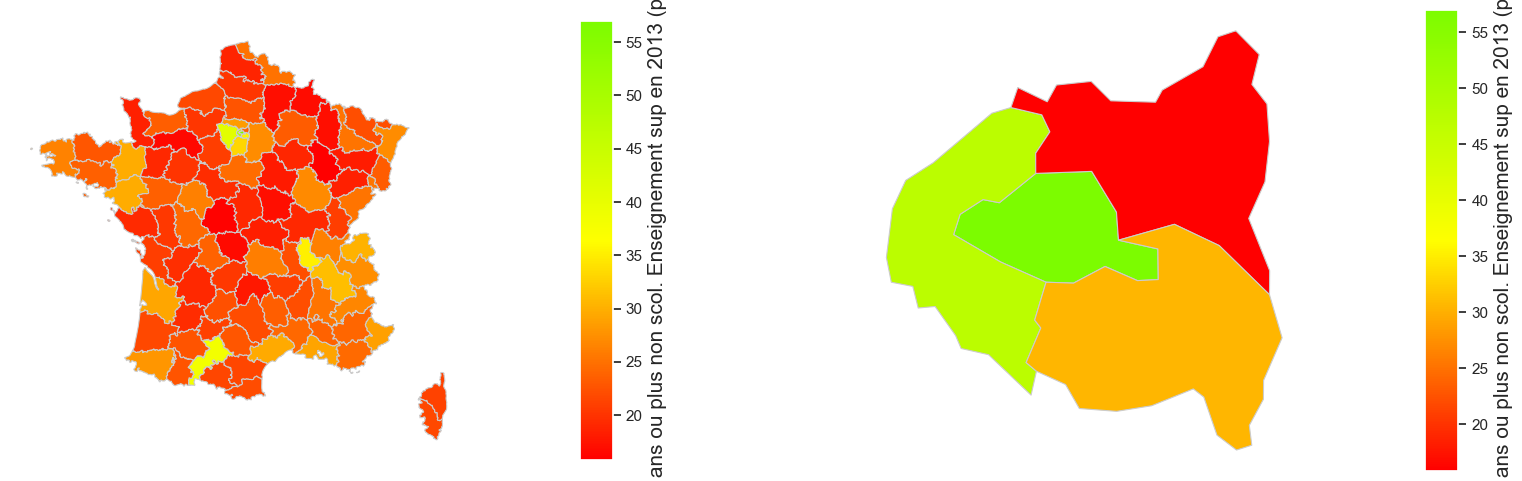

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
from IPython.display import display, clear_output


cmap = LinearSegmentedColormap.from_list('rg', ["red", "yellow", "lawngreen"], N=256)

def plot_data(choice):
    # On filtre les data pour afficher seulement l'ile de France
    codes_to_show = ['75', '92', '93', '94']
    filtered_data = df_final[df_final['Code du département'].isin(codes_to_show)]

    # Creation des subplots
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
    
    # Plot de toute la France
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.1)

    df_final.plot(column=choice, cmap=cmap, linewidth=0.8, ax=ax1, edgecolor='0.8', legend=False)

    norm1 = mpl.colors.Normalize(vmin=df_final[choice].min(), vmax=df_final[choice].max())
    cbar1 = plt.colorbar(mpl.cm.ScalarMappable(norm=norm1, cmap=cmap), cax=cax1)
    cbar1.set_label(f'{choice}', fontsize=15)

#    ax1.set_title(f'{choice} par Département', fontsize=15)
    ax1.set_axis_off()

    # Plot de l'ile de France
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.1)

    filtered_data.plot(column=choice, cmap=cmap, linewidth=0.8, ax=ax2, edgecolor='0.8', legend=False)

    norm2 = mpl.colors.Normalize(vmin=df_final[choice].min(), vmax=df_final[choice].max())
    cbar2 = plt.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmap), cax=cax2)
    cbar2.set_label(f'{choice}', fontsize=15)
#    ax2.set_title(f'{choice} en Ile-de-France', fontsize=15)
    ax2.set_axis_off()

    plt.show()
    
def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(dropdown)
        plot_data(change['new'])

choices = df_final.columns.tolist()
dropdown = widgets.Dropdown(options=choices, value=choices[0], description='Choix:')
dropdown.observe(on_change)

display(dropdown)
plot_data(choices[-14])

In [87]:
df_final.to_csv("/Users/chmilew/Documents/Python Projects/Entretien Saint Gobain/df_final.csv")

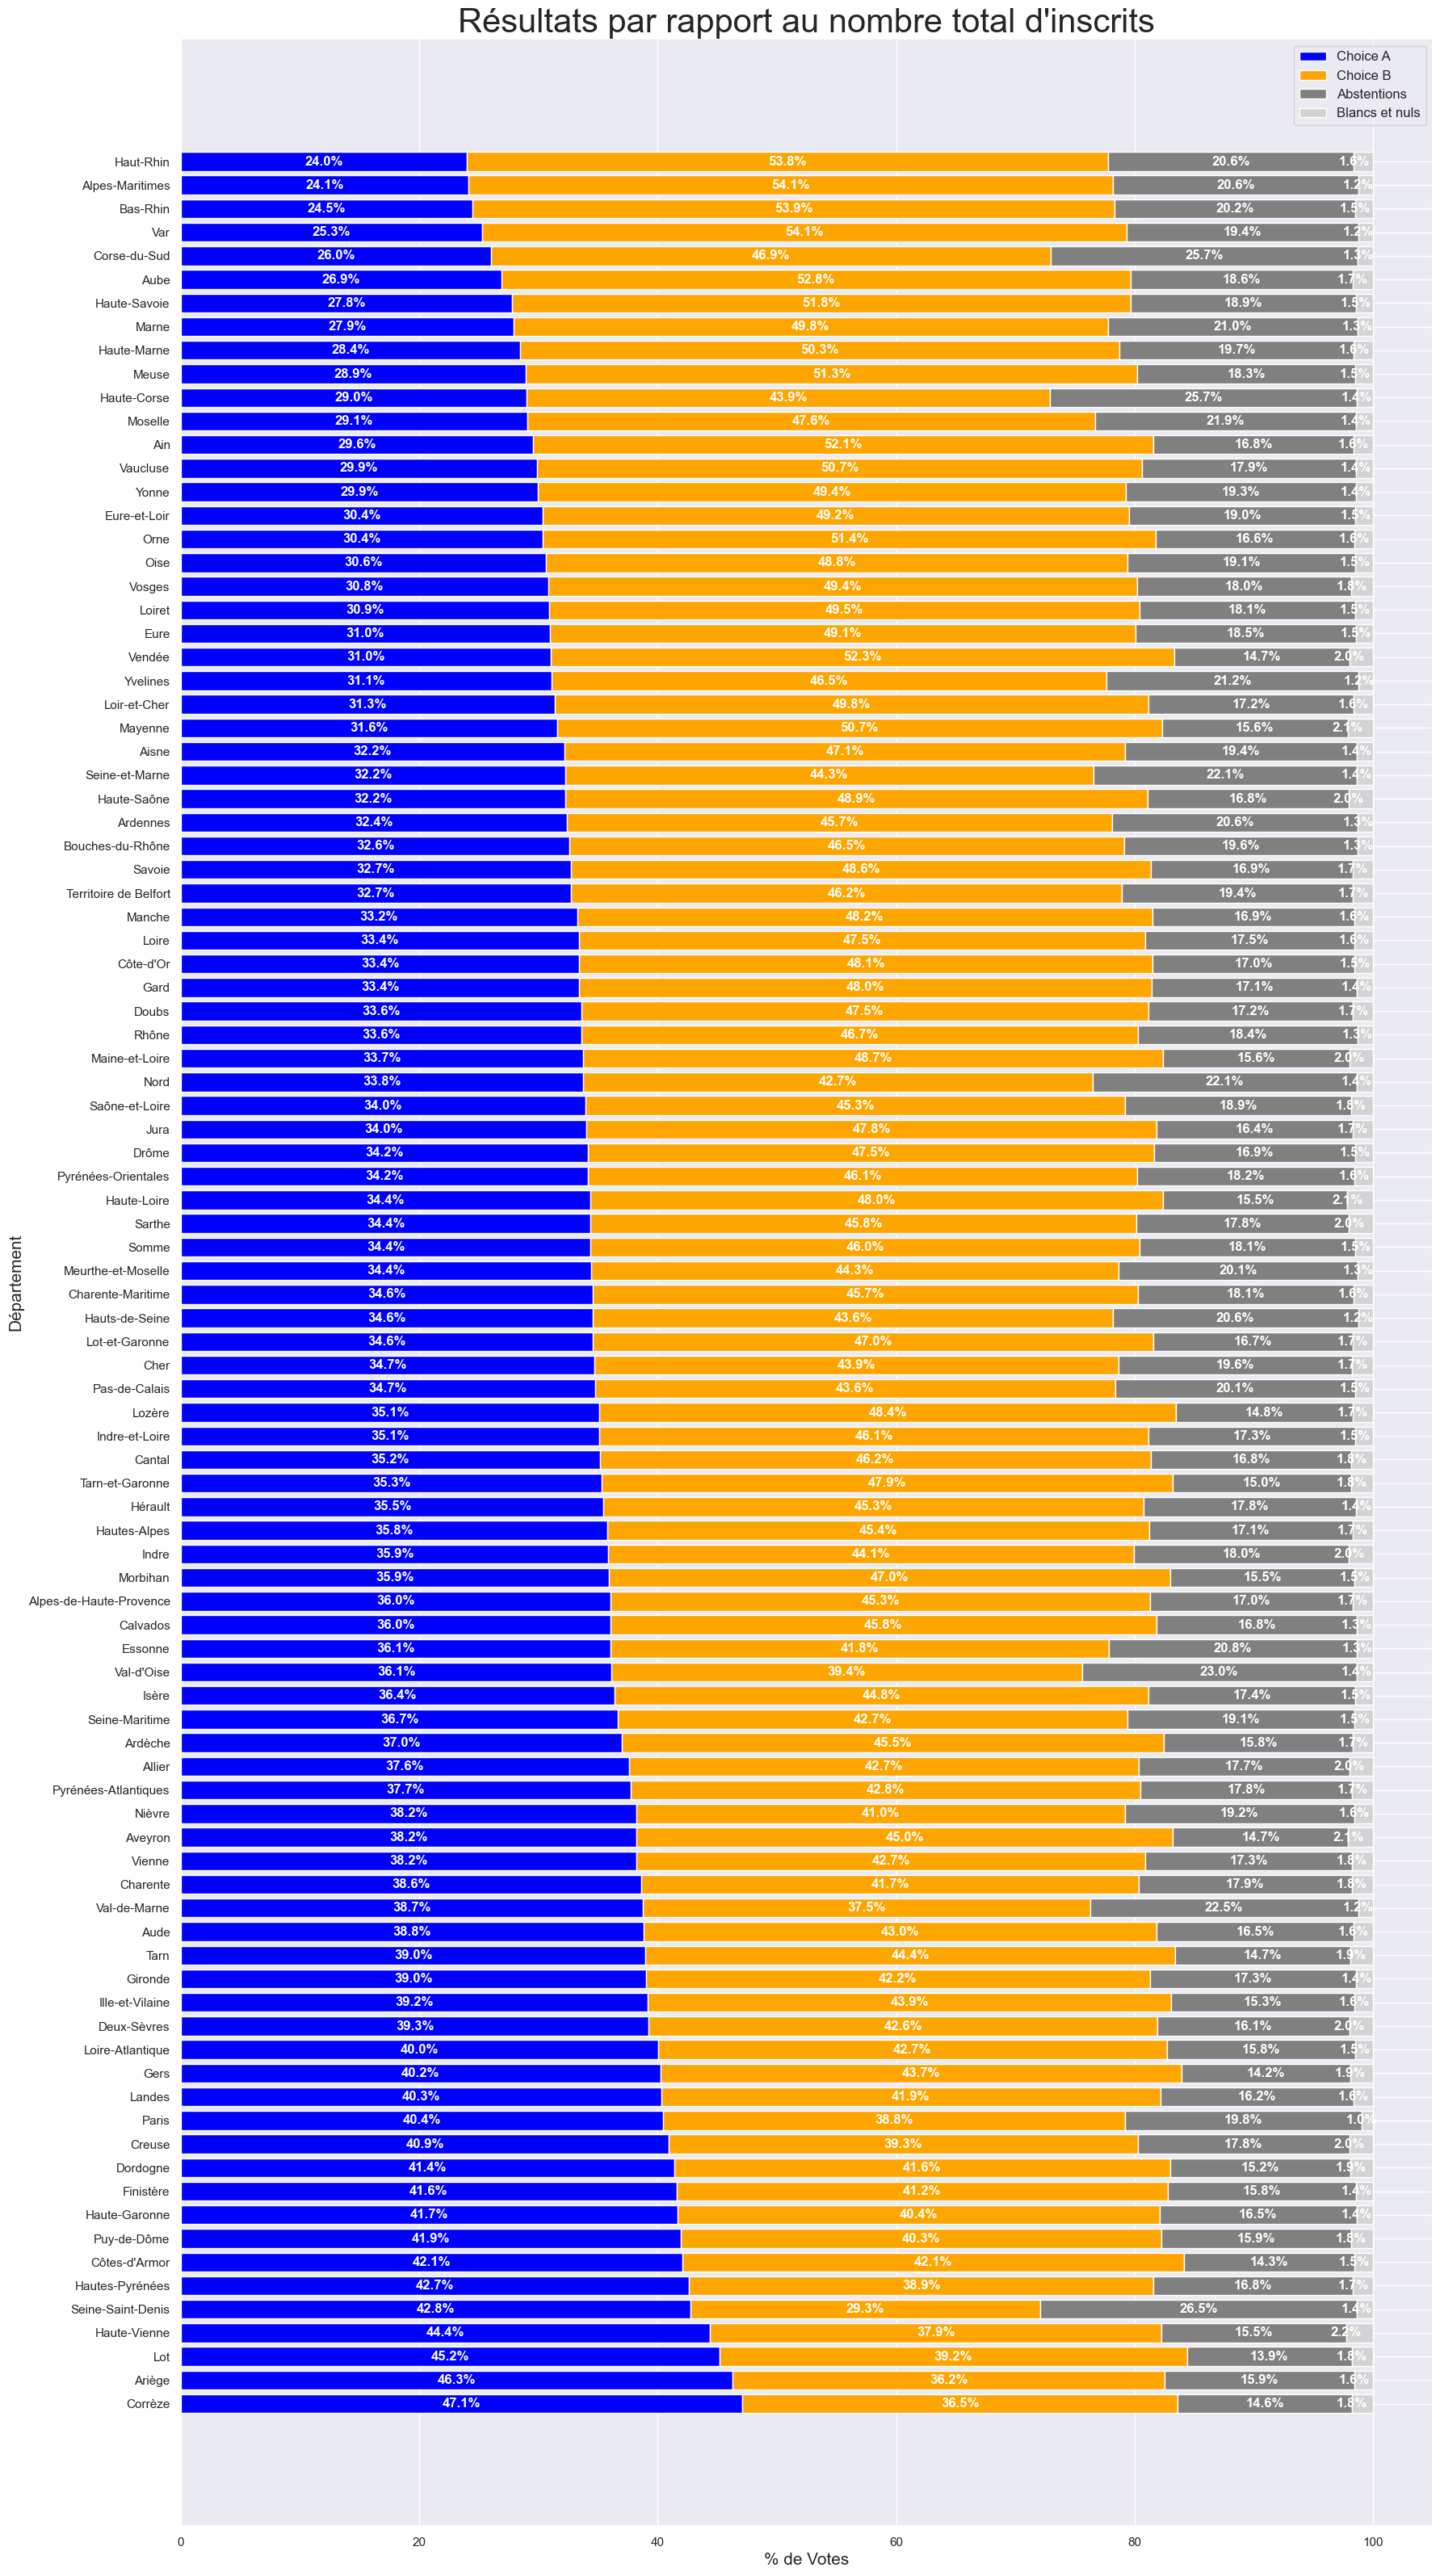

In [112]:
import matplotlib.pyplot as plt

# On groupe par nom de département et on somme sur les inscrits
departments = df_final2.groupby('nom')['Inscrits'].sum().sort_values(ascending=False)

start = 0
end = 10

# Calcul des pourcentages de Choix A,B abstentions et blancs et nuls pour chaque département
choice_a_counts = df_final2.groupby('nom')['Choix A'].sum()
choice_b_counts = df_final2.groupby('nom')['Choix B'].sum()
abstentions_counts = df_final2.groupby('nom')['Abstentions'].sum()
blanks_nuls_counts = df_final2.groupby('nom')['Blancs et nuls'].sum()
total_counts = choice_a_counts + choice_b_counts + abstentions_counts + blanks_nuls_counts

choice_a_percentages = choice_a_counts / total_counts * 100
choice_b_percentages = choice_b_counts / total_counts * 100
abstentions_percentages = abstentions_counts / total_counts * 100
blanks_nuls_percentages = blanks_nuls_counts / total_counts * 100

# Trie des départements selon le pourcentage de A
sorted_departments = choice_a_percentages.sort_values(ascending=False).index

# Plot
fig, ax = plt.subplots(figsize=(20, 40))
choice_a_bars = ax.barh(sorted_departments, choice_a_percentages[sorted_departments], color='blue', label='Choice A')
choice_b_bars = ax.barh(sorted_departments, choice_b_percentages[sorted_departments], left=choice_a_percentages[sorted_departments], color='orange', label='Choice B')
abstentions_bars = ax.barh(sorted_departments, abstentions_percentages[sorted_departments], left=choice_a_percentages[sorted_departments] + choice_b_percentages[sorted_departments], color='gray', label='Abstentions')
blanks_nuls_bars = ax.barh(sorted_departments, blanks_nuls_percentages[sorted_departments], left=choice_a_percentages[sorted_departments] + choice_b_percentages[sorted_departments] + abstentions_percentages[sorted_departments], color='lightgray', label='Blancs et nuls')

# Ajout d'annotation
for choice_a_bar, choice_b_bar, abstentions_bar, blanks_nuls_bar in zip(choice_a_bars, choice_b_bars, abstentions_bars, blanks_nuls_bars):
    total_count = choice_a_bar.get_width() + choice_b_bar.get_width() + abstentions_bar.get_width() + blanks_nuls_bar.get_width()
    choice_a_percentage = choice_a_bar.get_width() / total_count * 100
    choice_b_percentage = choice_b_bar.get_width() / total_count * 100
    abstentions_percentage = abstentions_bar.get_width() / total_count * 100
    blanks_nuls_percentage = blanks_nuls_bar.get_width() / total_count * 100
    
    ax.text(choice_a_bar.get_width()/2 , choice_a_bar.get_y() + choice_a_bar.get_height() / 2, f'{choice_a_percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text((choice_b_bar.get_x()+abstentions_bar.get_x())/2, choice_b_bar.get_y() + choice_b_bar.get_height() / 2, f'{choice_b_percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text((abstentions_bar.get_x()+blanks_nuls_bar.get_x())/2, abstentions_bar.get_y() + abstentions_bar.get_height() / 2, f'{abstentions_percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text(blanks_nuls_bar.get_x(), blanks_nuls_bar.get_y() + blanks_nuls_bar.get_height() / 2, f'{blanks_nuls_percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    
    
ax.set_xlabel('% de Votes', fontsize=15)
ax.set_ylabel('Département', fontsize=15)
ax.set_title('Résultats par rapport au nombre total d\'inscrits', fontsize=30)
ax.legend(fontsize=12)

plt.show()

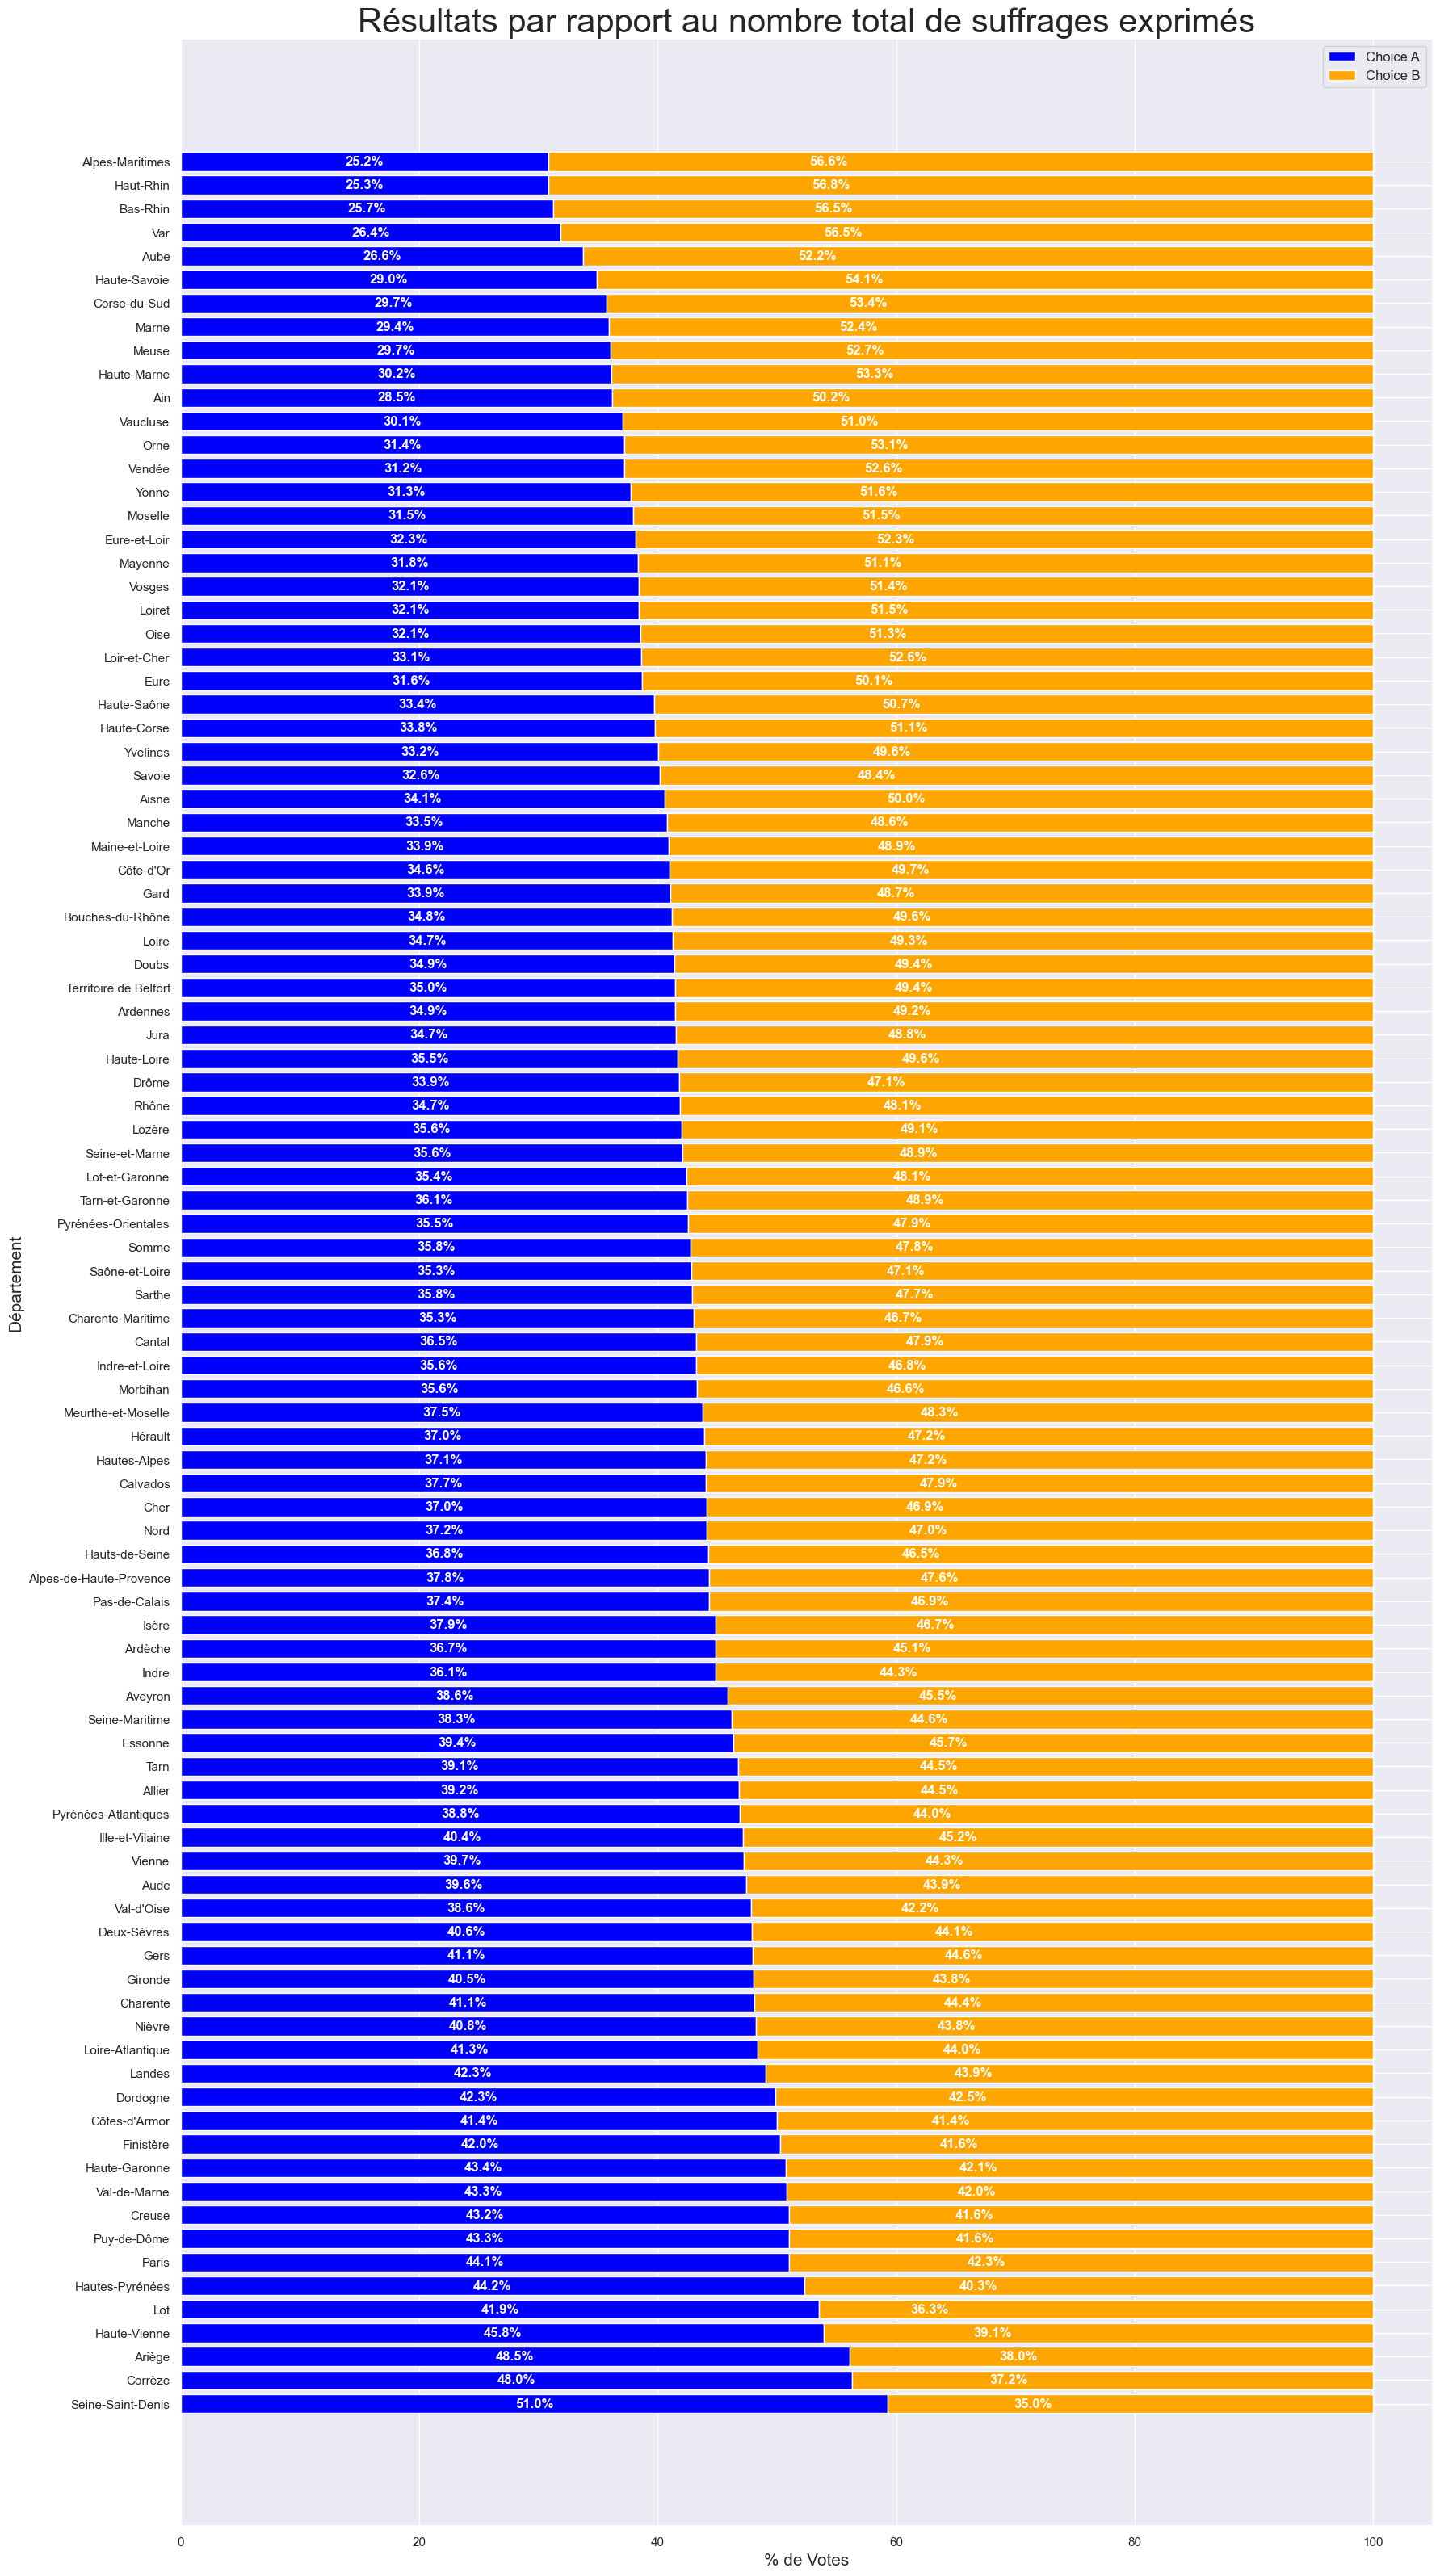

In [115]:
import matplotlib.pyplot as plt

#On regroupe par nom de département et on somme sur les inscrits, qu'on trie dans l'ordre décroissant
departments = df_final2.groupby('nom')['Inscrits'].sum().sort_values(ascending=False)

start = 0
end = 10

# On calcule le pourcentage de Choix A et Choix B, Abstentions et Blancs et nuls pour chaque département
choice_a_counts = df_final2.groupby('nom')['Choix A'].sum()
choice_b_counts = df_final2.groupby('nom')['Choix B'].sum()
total_counts = choice_a_counts + choice_b_counts

choice_a_percentages = choice_a_counts / total_counts * 100
choice_b_percentages = choice_b_counts / total_counts * 100

# On trie les départements basés sur la plus grande valeur d'abstention
sorted_departments = choice_a_percentages.sort_values(ascending=False).index

# Plot
fig, ax = plt.subplots(figsize=(20, 40))
choice_a_bars = ax.barh(sorted_departments, choice_a_percentages[sorted_departments], color='blue', label='Choice A')
choice_b_bars = ax.barh(sorted_departments, choice_b_percentages[sorted_departments], left=choice_a_percentages[sorted_departments], color='orange', label='Choice B')

# Ajout d'annotations
for choice_a_bar, choice_b_bar, abstentions_bar, blanks_nuls_bar in zip(choice_a_bars, choice_b_bars, abstentions_bars, blanks_nuls_bars):
    total_count = choice_a_bar.get_width() + choice_b_bar.get_width() + abstentions_bar.get_width() + blanks_nuls_bar.get_width()
    choice_a_percentage = choice_a_bar.get_width() / total_count * 100
    choice_b_percentage = choice_b_bar.get_width() / total_count * 100
    
    ax.text(choice_a_bar.get_width()/2 , choice_a_bar.get_y() + choice_a_bar.get_height() / 2, f'{choice_a_percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text((choice_b_bar.get_x()+abstentions_bar.get_x())/2, choice_b_bar.get_y() + choice_b_bar.get_height() / 2, f'{choice_b_percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
   

ax.set_xlabel('% de Votes', fontsize=15)
ax.set_ylabel('Département', fontsize=15)
ax.set_title('Résultats par rapport au nombre total de suffrages exprimés', fontsize=30)
ax.legend(fontsize=12)

plt.show()

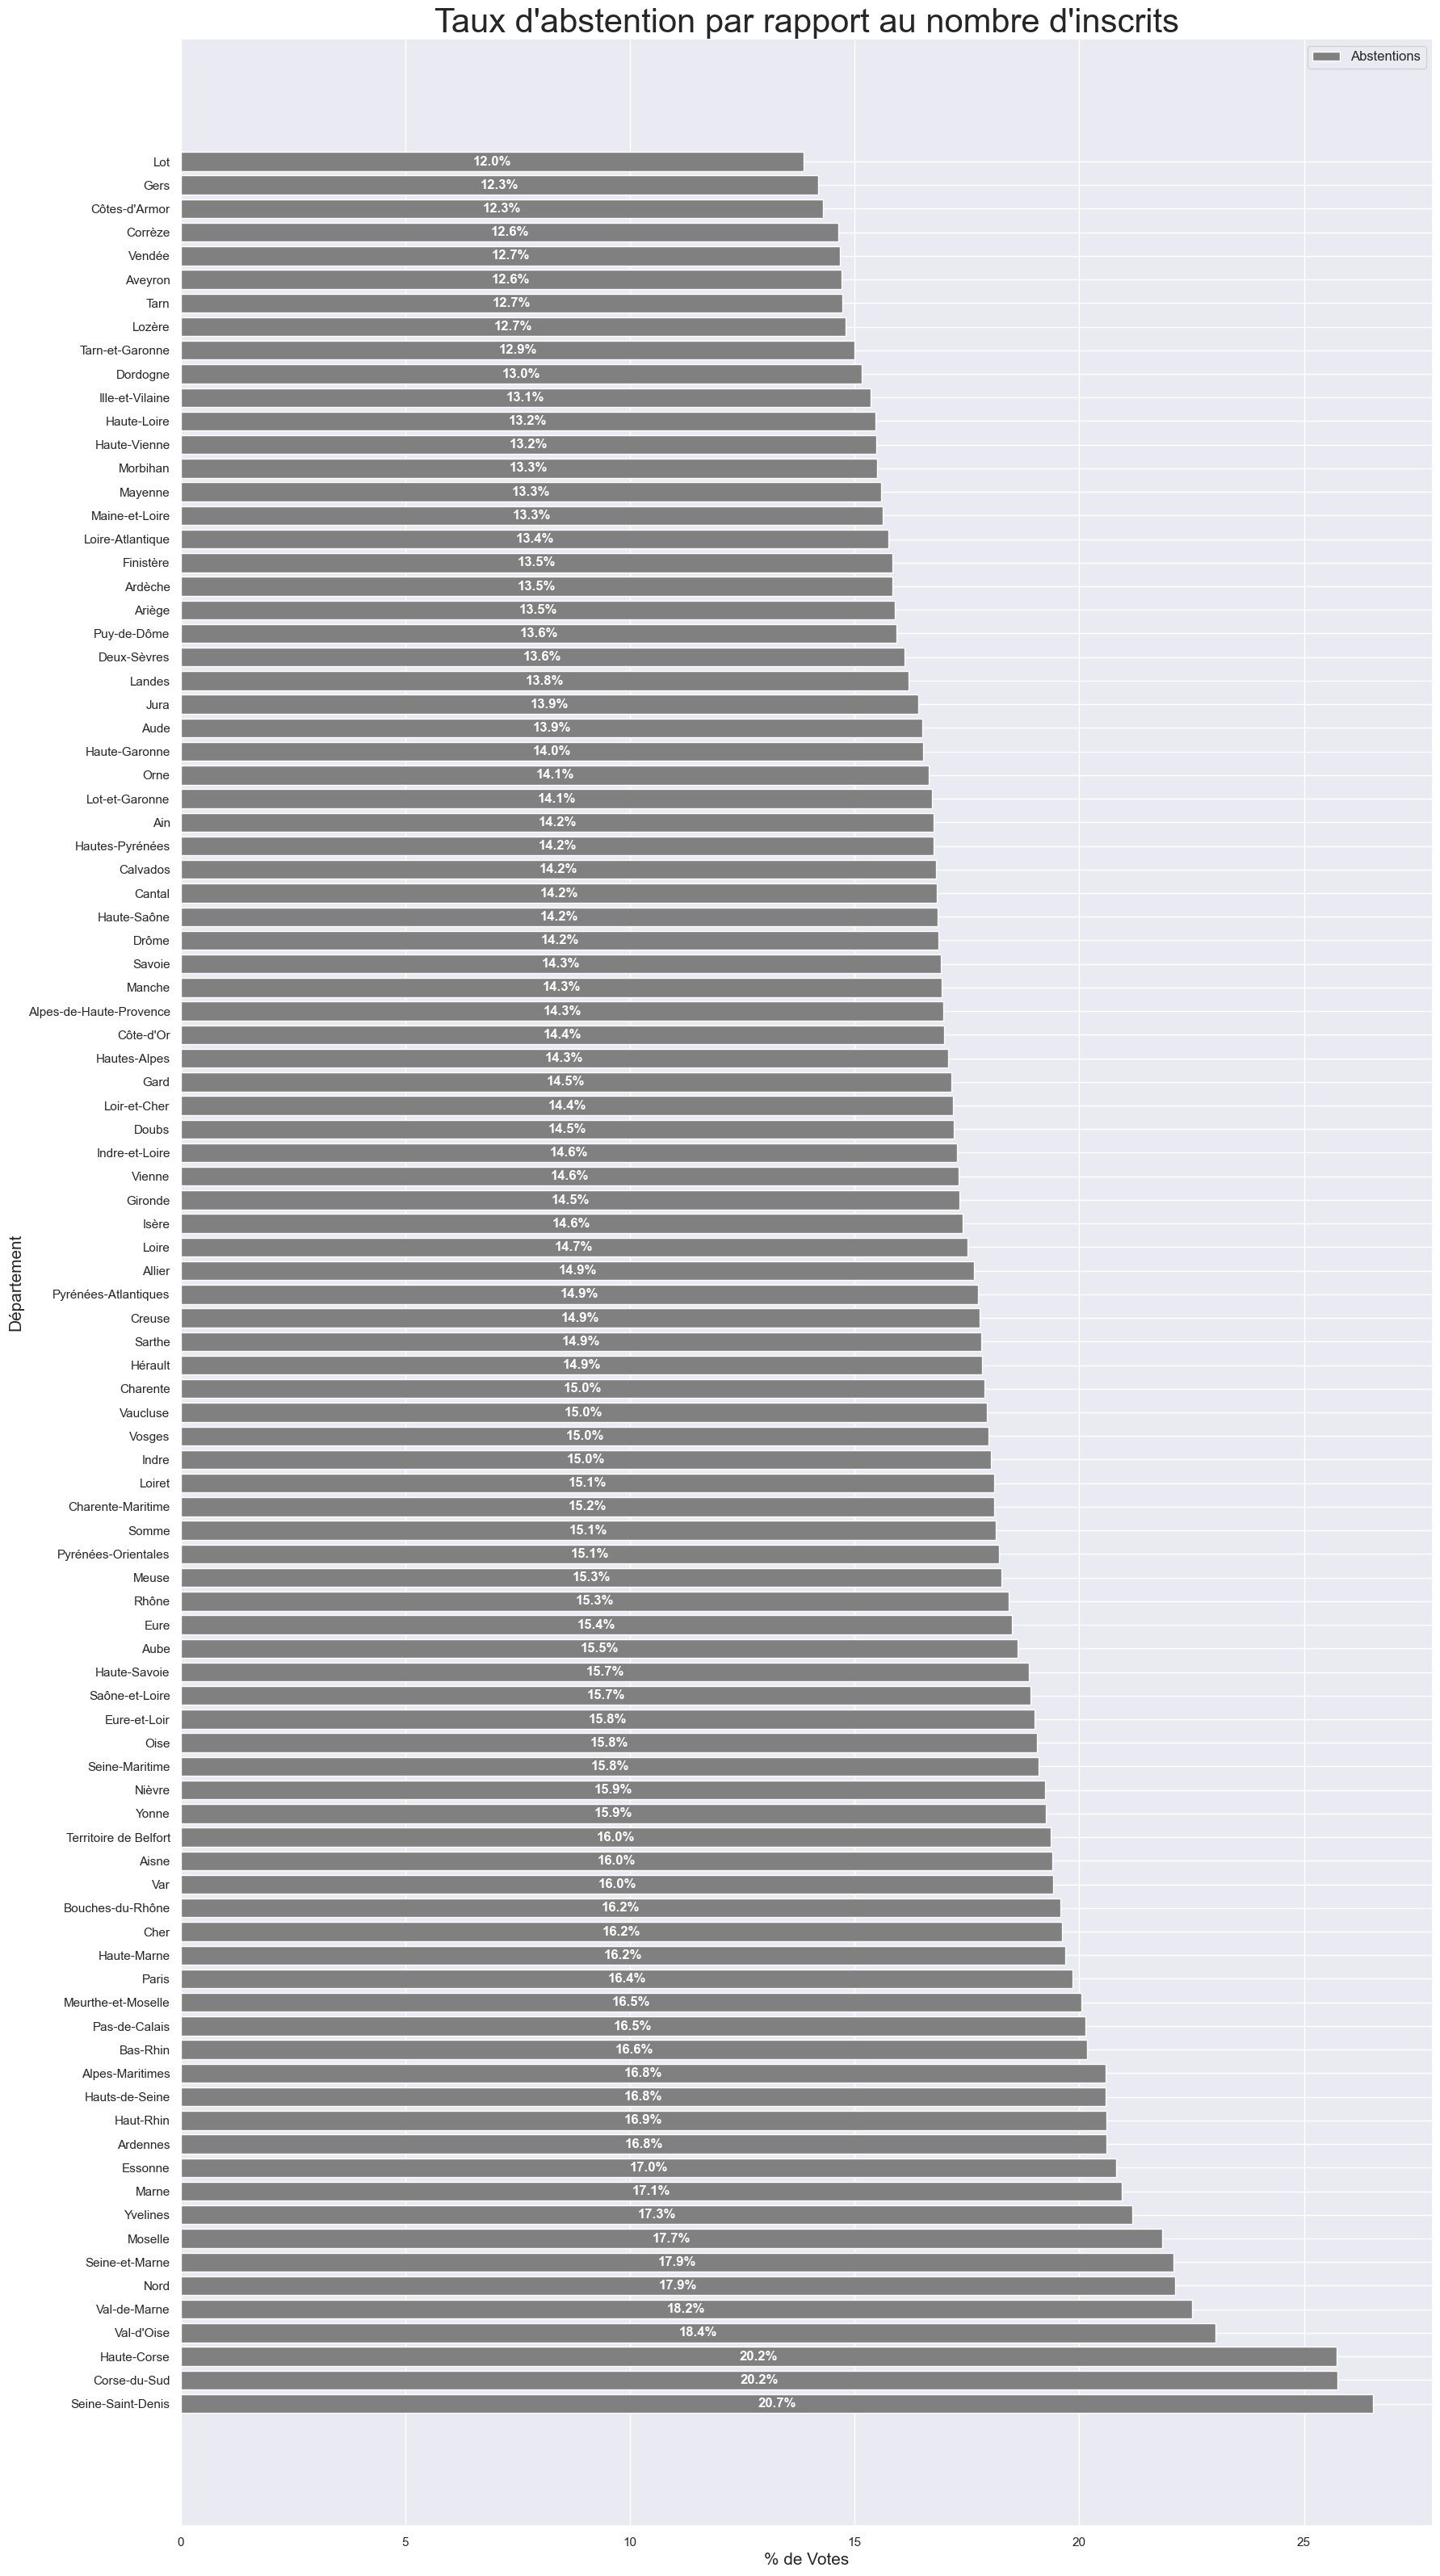

In [124]:
#On regroupe par nom de département et on somme sur les inscrits, qu'on trie dans l'ordre décroissant
departments = df_final.groupby('nom')['Inscrits'].sum().sort_values(ascending=False)

start = 0
end = 10

# On calcule le pourcentage de Choix A et Choix B, Abstentions et Blancs et nuls pour chaque département

abstentions_counts = df_final2.groupby('nom')['Abstentions'].sum()
total_counts = choice_a_counts + choice_b_counts + abstentions_counts + blanks_nuls_counts

choice_a_percentages = choice_a_counts / total_counts * 100
choice_b_percentages = choice_b_counts / total_counts * 100
abstentions_percentages = abstentions_counts / total_counts * 100
blanks_nuls_percentages = blanks_nuls_counts / total_counts * 100

# On trie les départements basés sur la plus grande valeur d'abstention
sorted_departments = abstentions_percentages.sort_values(ascending=False).index

# Plot
fig, ax = plt.subplots(figsize=(20, 40))
abstentions_bars = ax.barh(sorted_departments, abstentions_percentages[sorted_departments], color='gray', label='Abstentions')


# Annotations avec pourcentage au milieu de chaque rectange
for choice_a_bar, choice_b_bar, abstentions_bar, blanks_nuls_bar in zip(choice_a_bars, choice_b_bars, abstentions_bars, blanks_nuls_bars):
    total_count = choice_a_bar.get_width() + choice_b_bar.get_width() + abstentions_bar.get_width() + blanks_nuls_bar.get_width()
    abstentions_percentage = abstentions_bar.get_width() / total_count * 100
#choice_a_bar.get_width()/2 , choice_a_bar.get_y() + choice_a_bar.get_height() / 2    
    ax.text(abstentions_bar.get_width() /2, abstentions_bar.get_y() + abstentions_bar.get_height() / 2, f'{abstentions_percentage:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    
ax.set_xlabel('% de Votes', fontsize=15)
ax.set_ylabel('Département', fontsize=15)
ax.set_title('Taux d\'abstention par rapport au nombre d\'inscrits', fontsize=30)
ax.legend(fontsize=12)

plt.show()

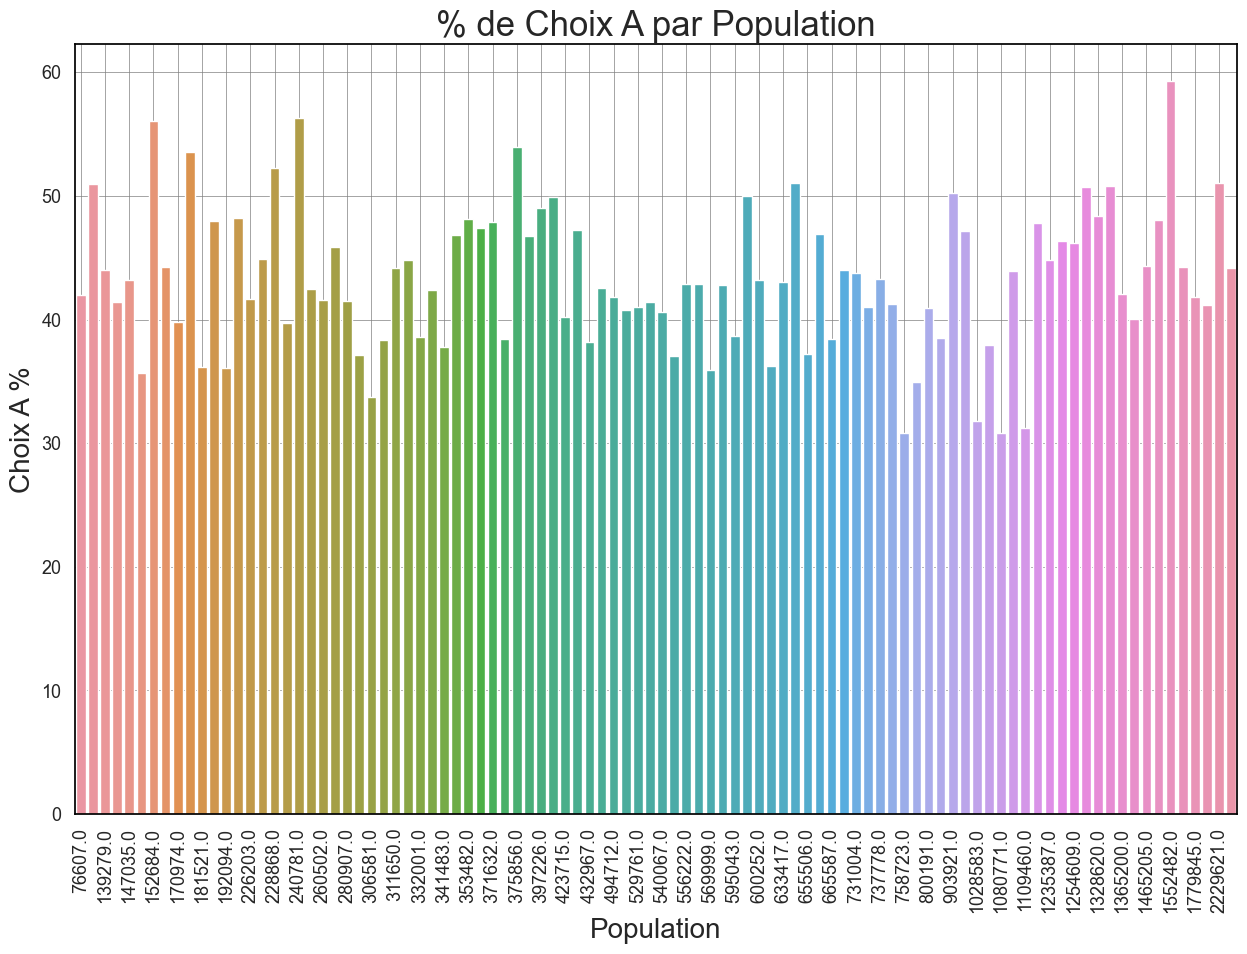

In [91]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=np.round(df_final['Population en 2013 (princ)'], 1), y=df_final['Choix A %'])
plt.title('% de Choix A par Population', fontsize=25)
plt.xlabel('Population', fontsize=20)
plt.ylabel('Choix A %', fontsize=20)

# Get every 2nd xtick label
xticklabels = [label.get_text() for label in ax.get_xticklabels()][::2]
xticks = ax.get_xticks()[::2]

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey',linewidth=0.5)
plt.show()

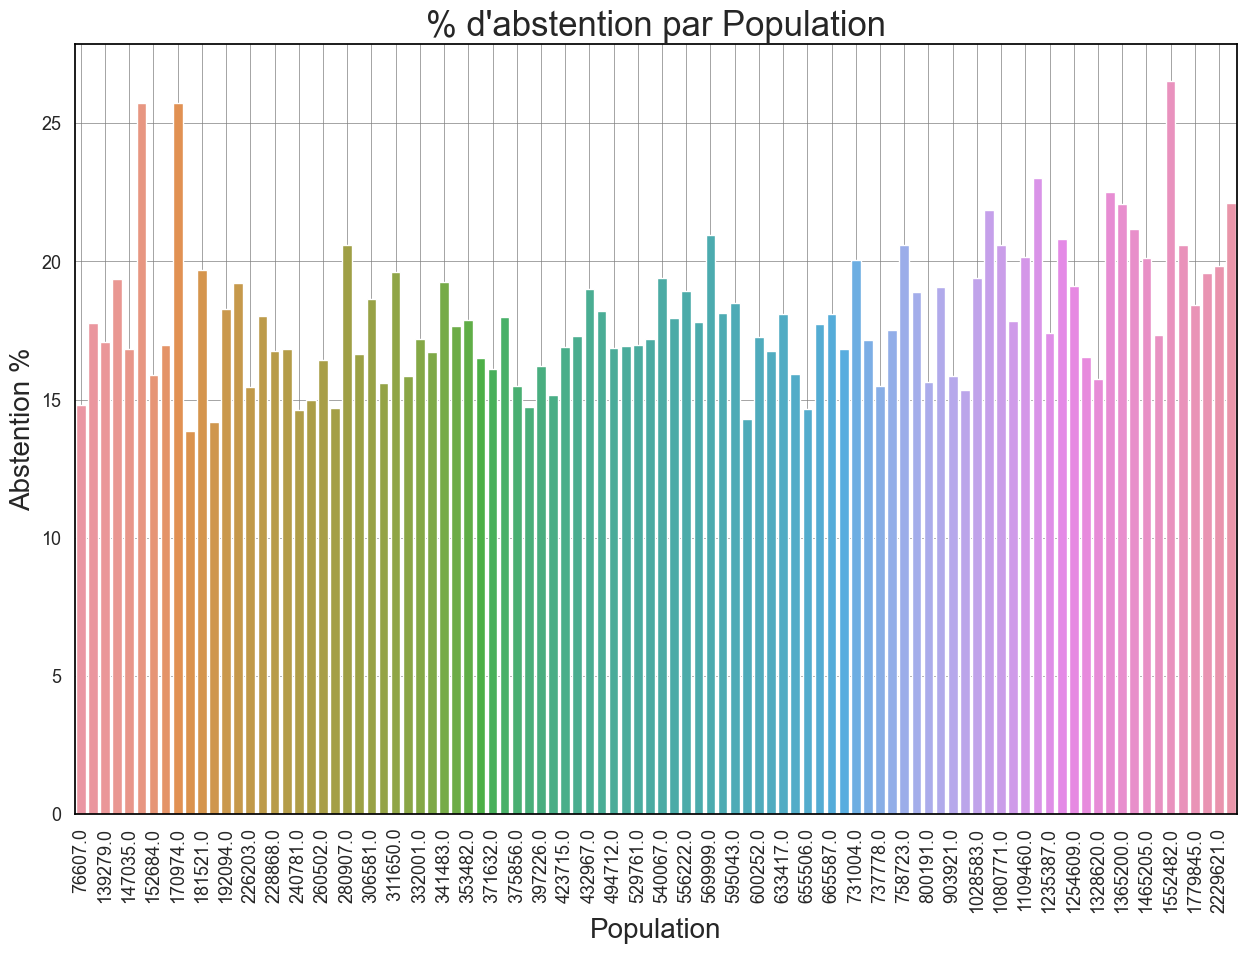

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))

# Sort the DataFrame by 'Population en 2013 (princ)' in ascending order
df_sorted = df_final.sort_values('Population en 2013 (princ)', ascending=True)

sns.barplot(x=np.round(df_sorted['Population en 2013 (princ)']), y=df_sorted['Abstentions %'])

# On affiche seulement 1 xtick sur 2
xticklabels = [label.get_text() for label in ax.get_xticklabels()][::2]
xticks = ax.get_xticks()[::2]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=13)

plt.title('% d\'abstention par Population', fontsize=25)
plt.xlabel('Population', fontsize=20)
plt.ylabel('Abstention %', fontsize=20)
ax.tick_params(axis='y', labelsize=13)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

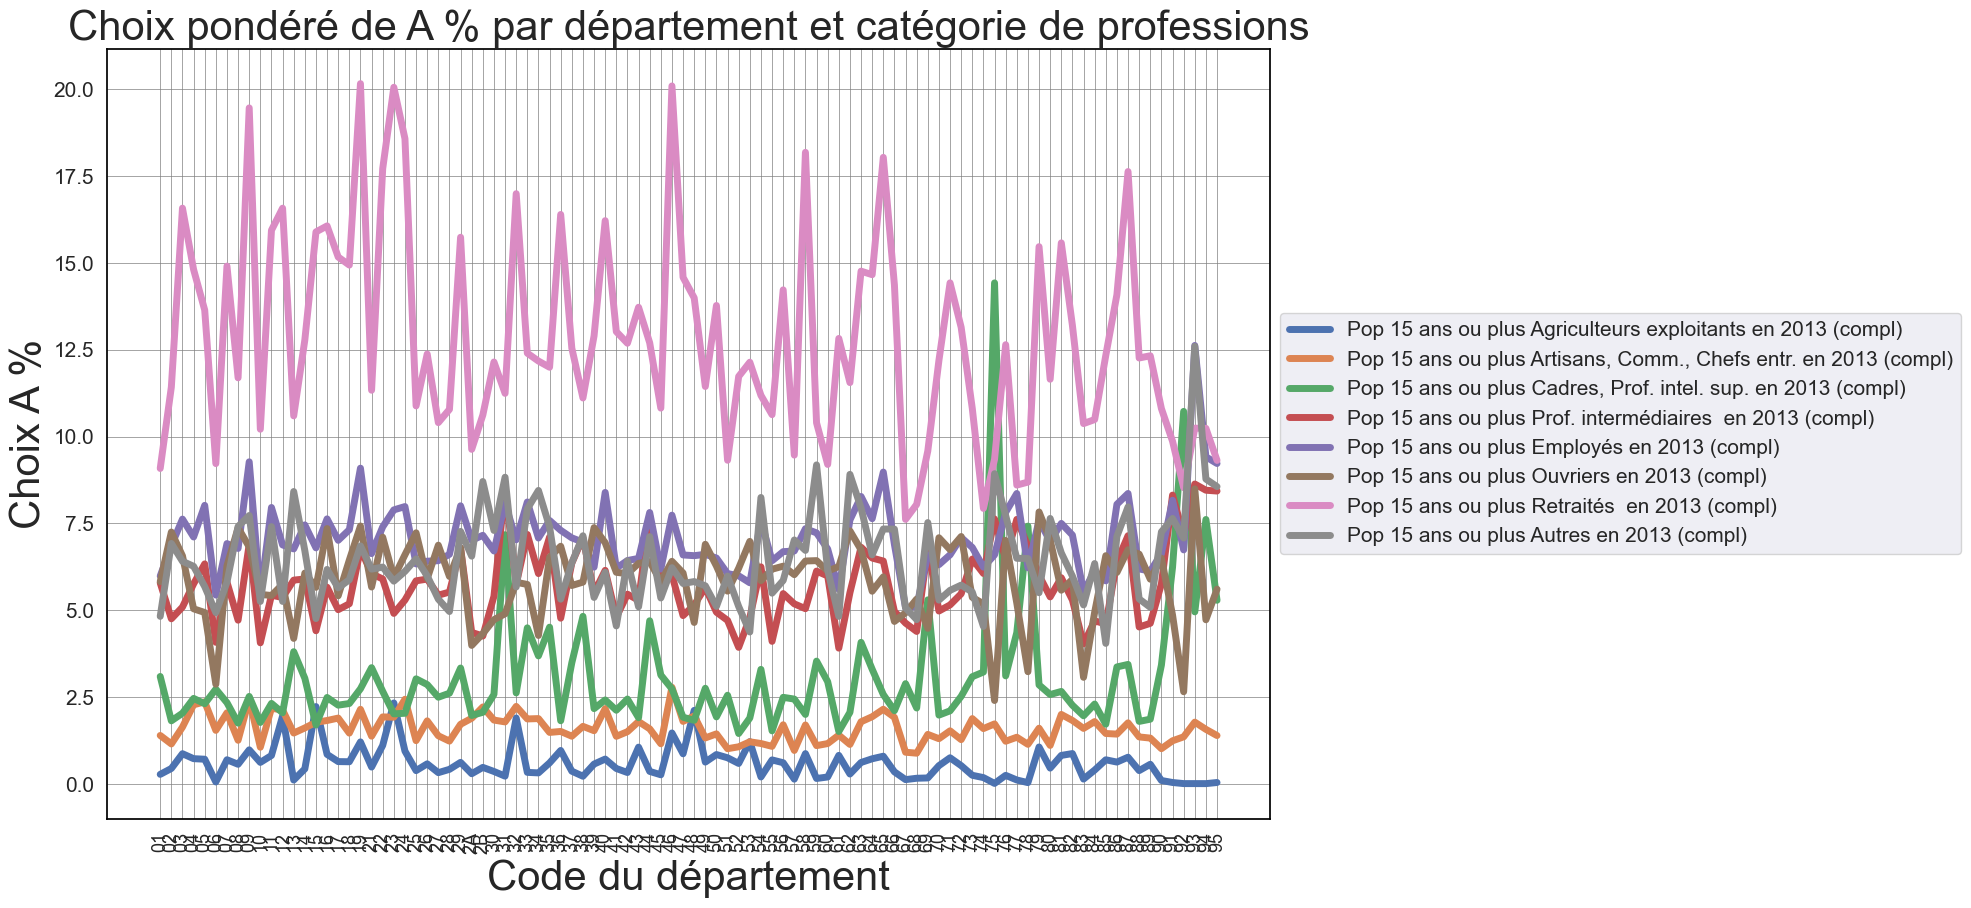

In [117]:
## POURCENTAGE CHOIX A SUIVANT PROFESSION

prof_ranges = df_final.columns.unique().tolist()[34:42]

# On normalise la population de chaque profession par leur population totale respective
total_population = df_final[age_ranges].sum(axis=1)
normalized_population = df_final[prof_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Choix A %'
weighted_choice_a = normalized_population.mul(df_final['Choix A %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for prof_range in prof_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[prof_range], label=prof_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Choix A %', fontsize=30)
plt.title('Choix pondéré de A % par département et catégorie de professions', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

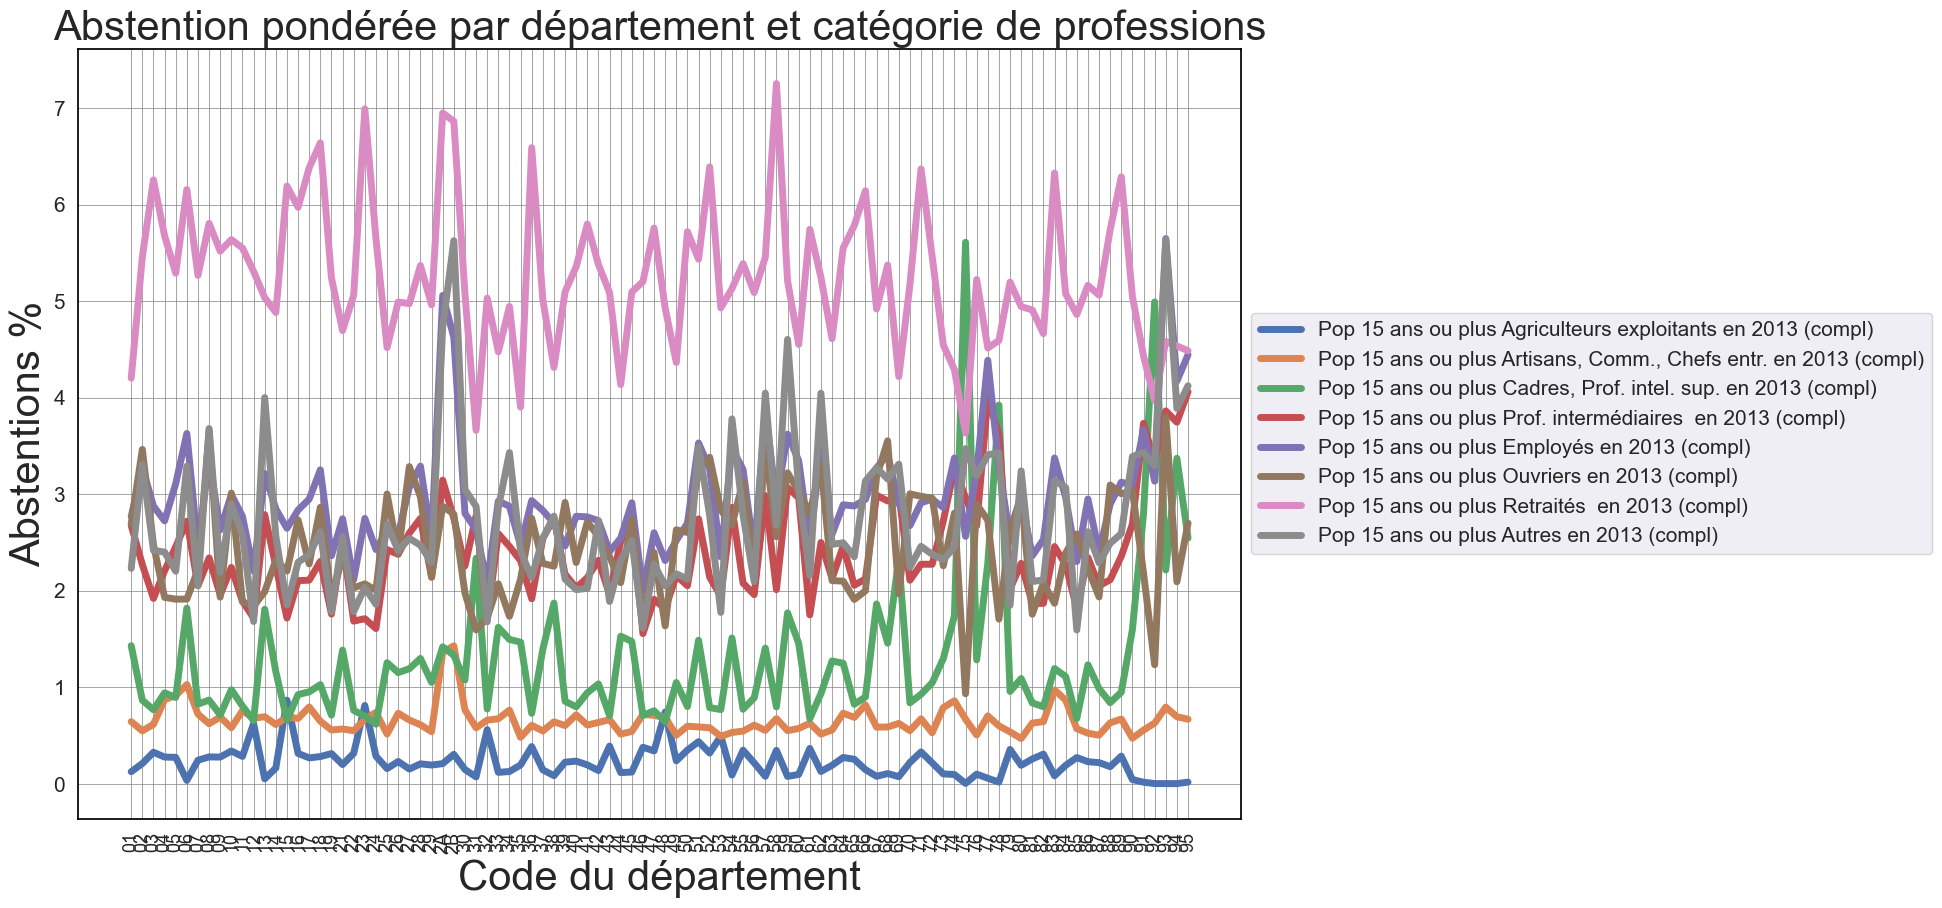

In [130]:
## POURCENTAGE Abstention SUIVANT PROFESSION

prof_ranges = df_final.columns.unique().tolist()[34:42]

# On normalise la population de chaque profession par leur population totale respective
total_population = df_final[age_ranges].sum(axis=1)
normalized_population = df_final[prof_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Abstentions %'
weighted_choice_a = normalized_population.mul(df_final['Abstentions %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for prof_range in prof_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[prof_range], label=prof_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Abstentions %', fontsize=30)
plt.title('Abstention pondérée par département et catégorie de professions', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

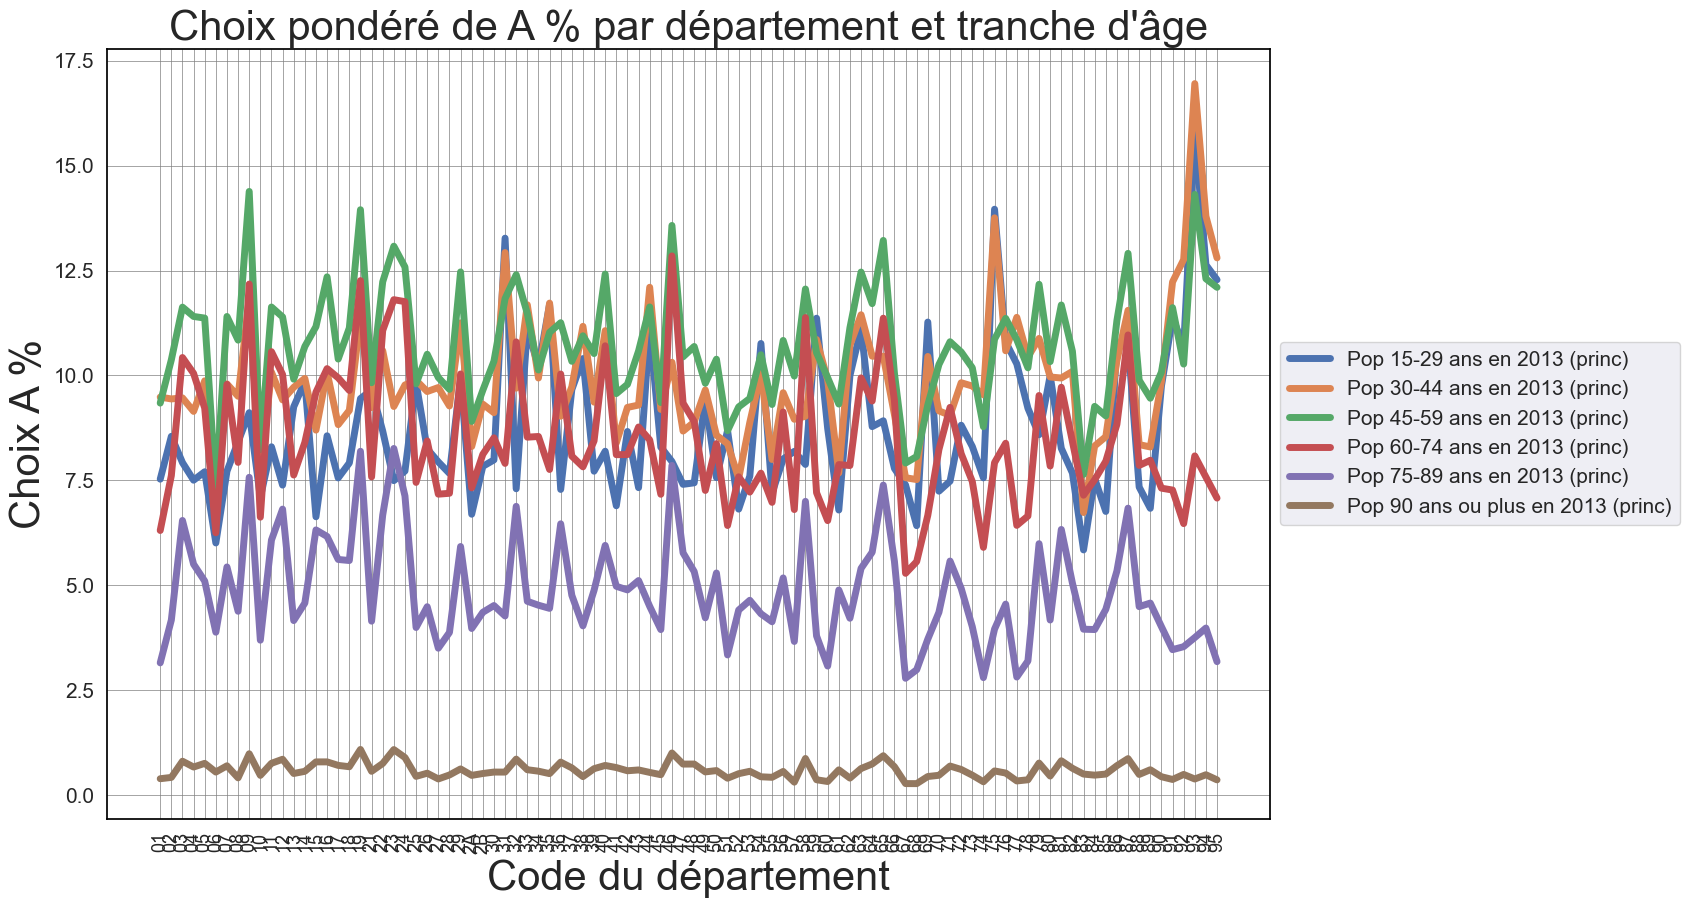

In [114]:
age_ranges = [
    'Pop 15-29 ans en 2013 (princ)',
    'Pop 30-44 ans en 2013 (princ)',
    'Pop 45-59 ans en 2013 (princ)',
    'Pop 60-74 ans en 2013 (princ)',
    'Pop 75-89 ans en 2013 (princ)',
    'Pop 90 ans ou plus en 2013 (princ)',
]

# On normalise la population de chaque tranche d'âge par leur population totale respective
total_population = df_final[age_ranges].sum(axis=1)
normalized_population = df_final[age_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Choix A %'
weighted_choice_a = normalized_population.mul(df_final['Choix A %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for age_range in age_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[age_range], label=age_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Choix A %', fontsize=30)
plt.title('Choix pondéré de A % par département et tranche d\'âge', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()


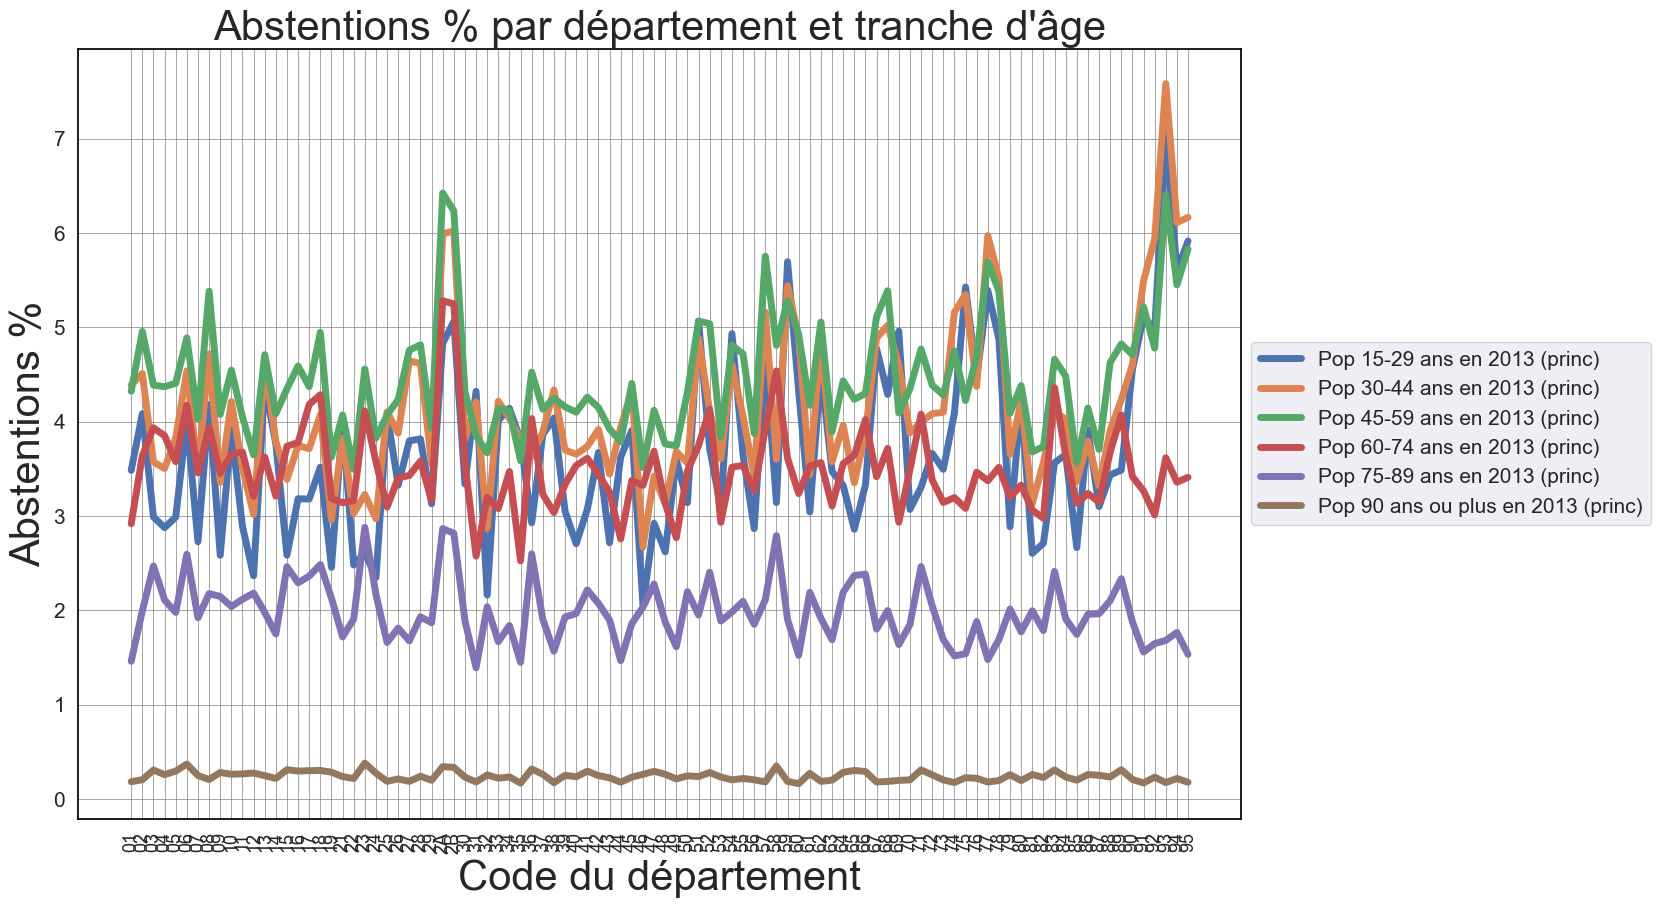

In [132]:
age_ranges = [
    'Pop 15-29 ans en 2013 (princ)',
    'Pop 30-44 ans en 2013 (princ)',
    'Pop 45-59 ans en 2013 (princ)',
    'Pop 60-74 ans en 2013 (princ)',
    'Pop 75-89 ans en 2013 (princ)',
    'Pop 90 ans ou plus en 2013 (princ)',
]

# On normalise la population de chaque tranche d'âge par leur population totale respective
total_population = df_final[age_ranges].sum(axis=1)
normalized_population = df_final[age_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Abstentions %'
weighted_choice_a = normalized_population.mul(df_final['Abstentions %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for age_range in age_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[age_range], label=age_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Abstentions %', fontsize=30)
plt.title('Abstentions % par département et tranche d\'âge', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

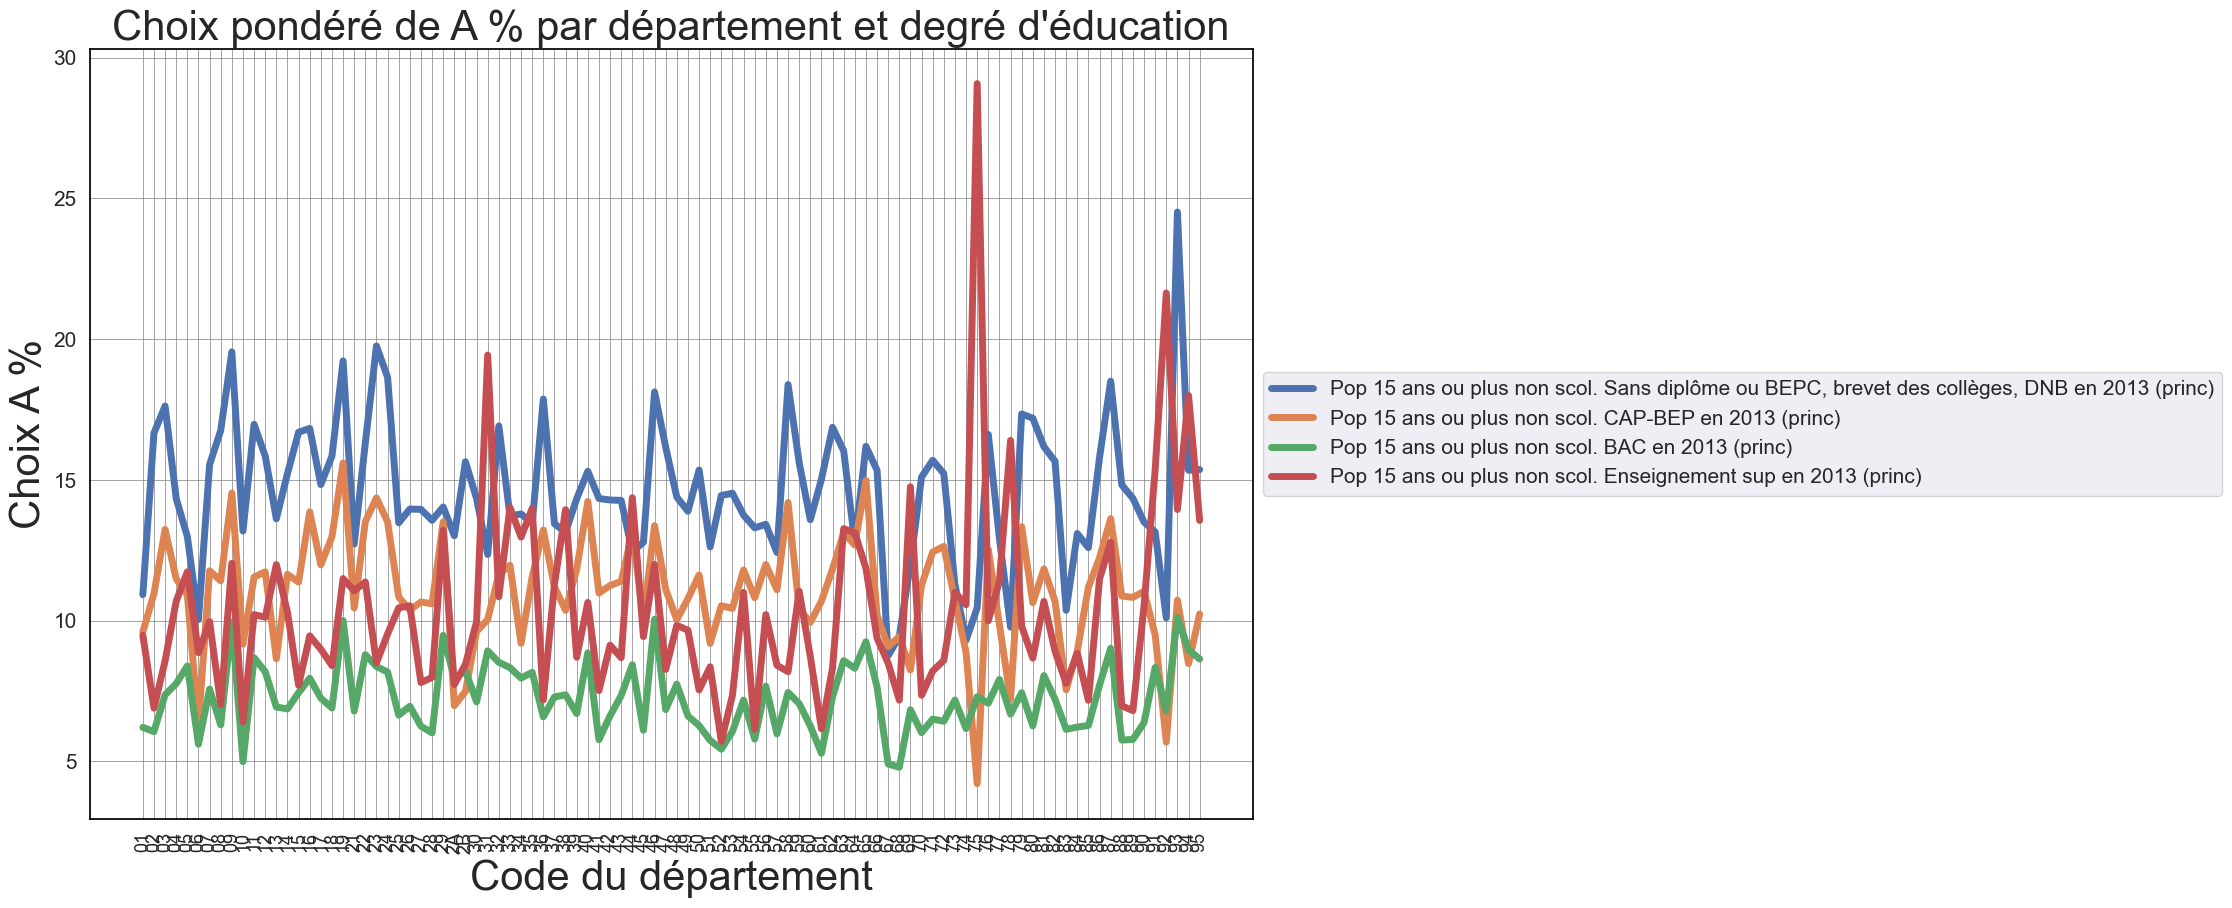

In [119]:
## POURCENTAGE CHOIX A SUIVANT DIPLOME

scol_ranges = df_final.columns.tolist()[104:108]

# On normalise la population de chaque profession par leur population totale respective
total_population = df_final[scol_ranges].sum(axis=1)
normalized_population = df_final[scol_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Choix A %'
weighted_choice_a = normalized_population.mul(df_final['Choix A %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for scol_range in scol_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[scol_range], label=scol_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Choix A %', fontsize=30)
plt.title('Choix pondéré de A % par département et degré d\'éducation', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

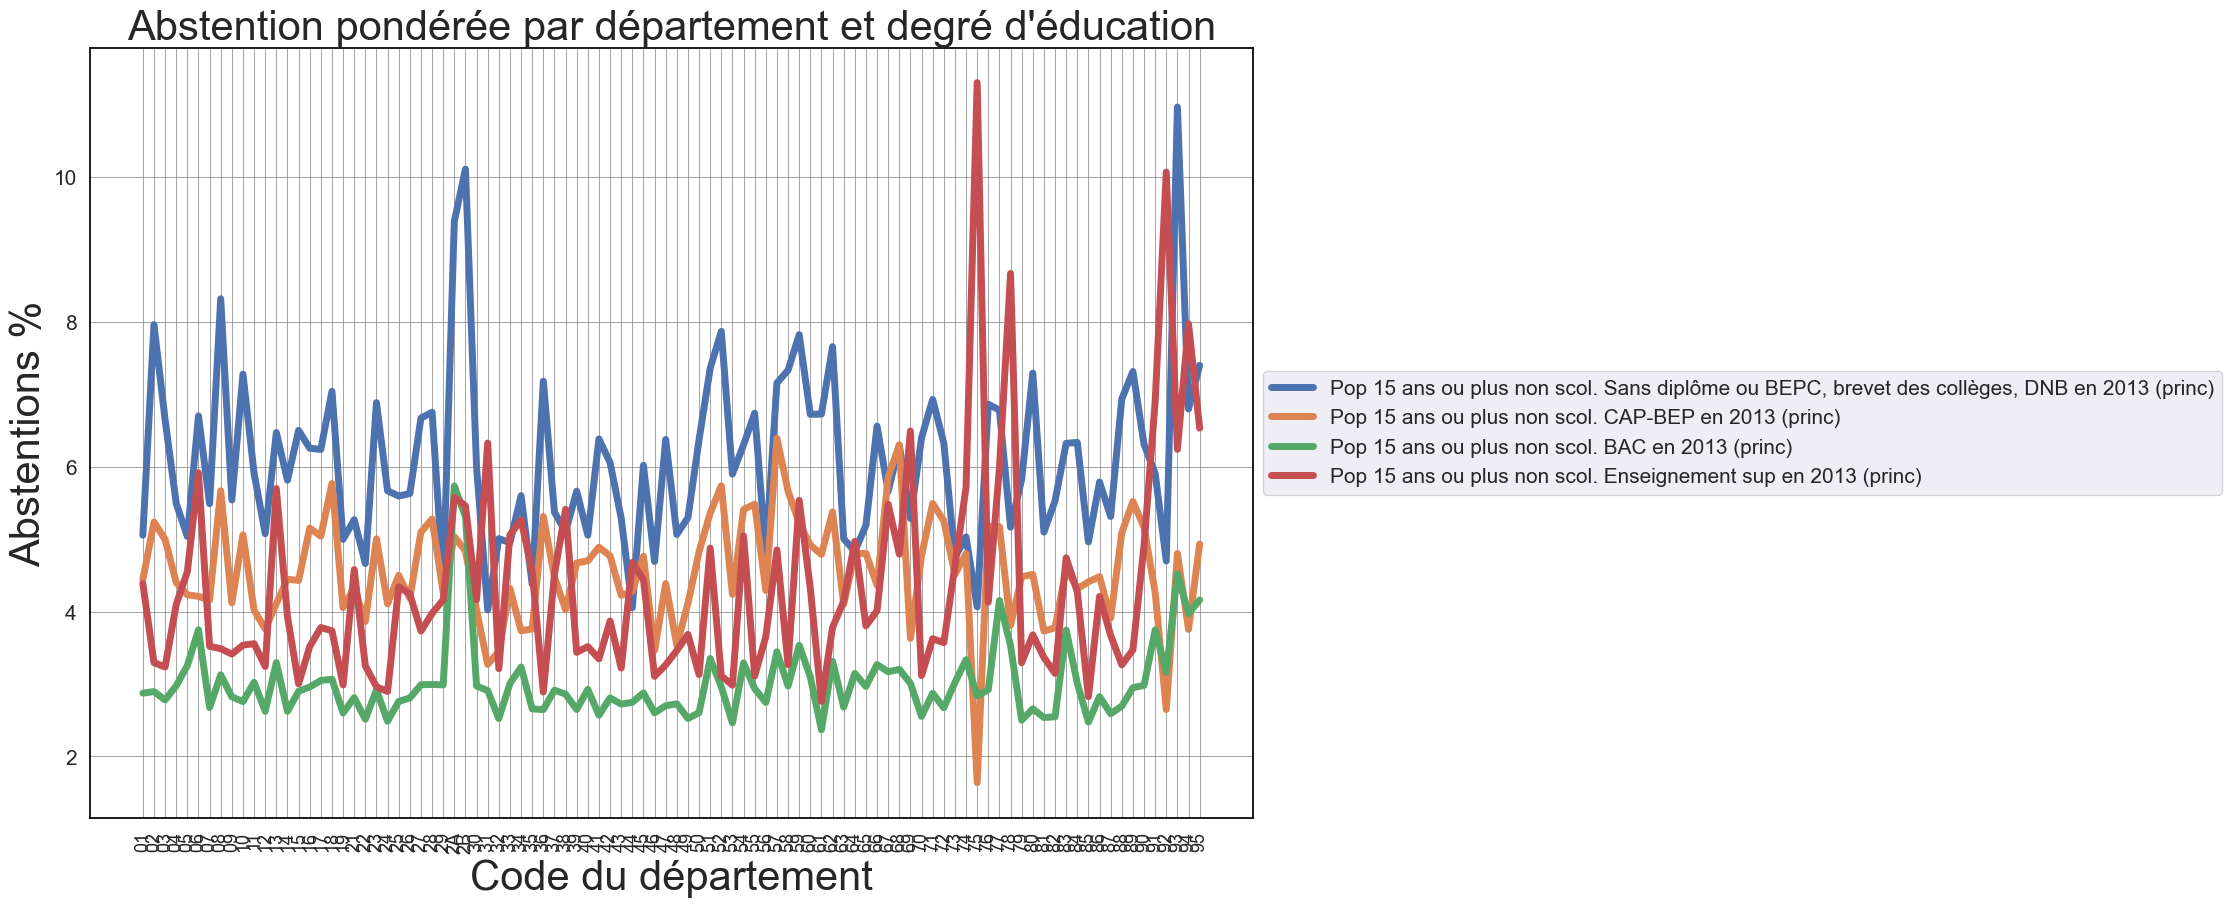

In [131]:
## POURCENTAGE Abstention SUIVANT DIPLOME

scol_ranges = df_final.columns.tolist()[104:108]

# On normalise la population de chaque profession par leur population totale respective
total_population = df_final[scol_ranges].sum(axis=1)
normalized_population = df_final[scol_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Choix A %'
weighted_choice_a = normalized_population.mul(df_final['Abstentions %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for scol_range in scol_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[scol_range], label=scol_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Abstentions %', fontsize=30)
plt.title('Abstention pondérée par département et degré d\'éducation', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

In [120]:
df_final.columns.unique().tolist()[91:100]

['Taux de pauvreté-Ensemble',
 'Taux de pauvreté-moins de 30 ans',
 'Taux de pauvreté-30 à 39 ans ',
 'Taux de pauvreté-40 à 49 ans',
 'Taux de pauvreté-50 à 59 ans',
 'Taux de pauvreté-60 à 74 ans',
 'Taux de pauvreté-75 ans ou plus',
 'Taux de pauvreté-propriétaires',
 'Taux de pauvreté-locataires']

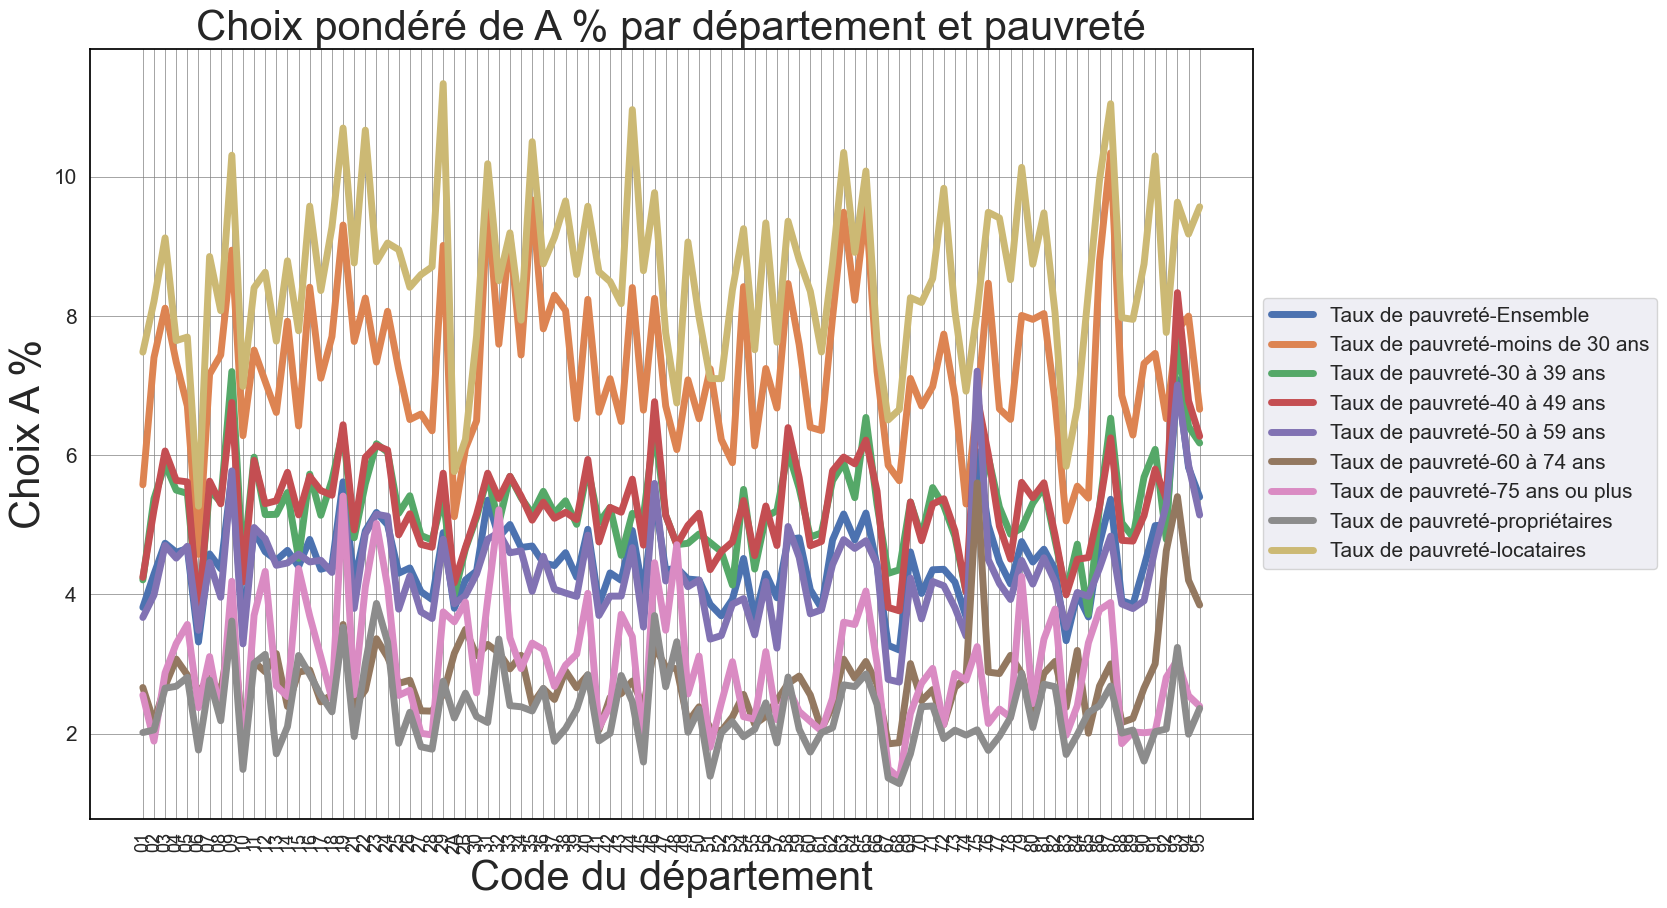

In [127]:
## POURCENTAGE CHOIX A SUIVANT Pauvreté

pov_ranges = df_final.columns.unique().tolist()[91:100]

# On normalise la population de chaque profession par leur population totale respective
total_population = df_final[pov_ranges].sum(axis=1)
normalized_population = df_final[pov_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Choix A %'
weighted_choice_a = normalized_population.mul(df_final['Choix A %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for pov_range in pov_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[pov_range], label=pov_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Choix A %', fontsize=30)
plt.title('Choix pondéré de A % par département et pauvreté', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

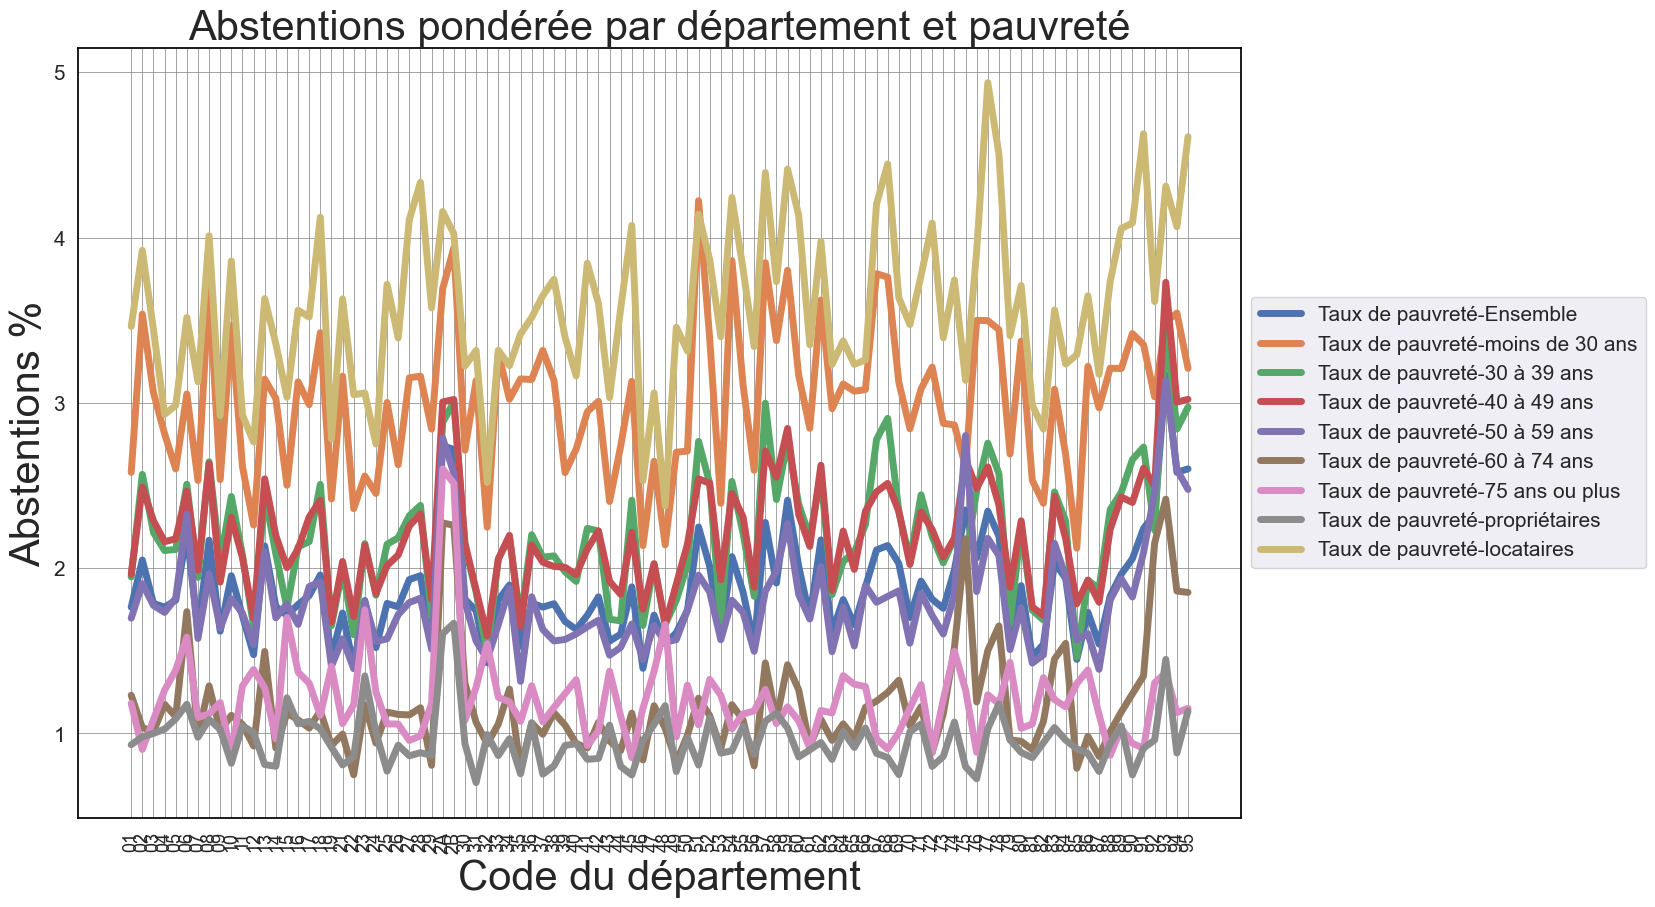

In [133]:
## POURCENTAGE ABSTENTION SUIVANT Pauvreté

pov_ranges = df_final.columns.unique().tolist()[91:100]

# On normalise la population de chaque profession par leur population totale respective
total_population = df_final[pov_ranges].sum(axis=1)
normalized_population = df_final[pov_ranges].div(total_population, axis=0)

# On multiplie la population normalisée par la colonne 'Abstentions %'
weighted_choice_a = normalized_population.mul(df_final['Abstentions %'], axis=0)

# Plot
fig, ax = plt.subplots(figsize=(15, 10), facecolor='w')
for pov_range in pov_ranges:
    ax.plot(df_final['Code du département'], weighted_choice_a[pov_range], label=pov_range, linewidth=5)
ax.legend(fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Code du département', fontsize=30)
ax.set_ylabel('Abstentions %', fontsize=30)
plt.title('Abstentions pondérée par département et pauvreté', fontsize=30)
ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.gca().set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
plt.grid(color='grey', linewidth=0.5)
plt.show()

# Machine Learning

In [100]:
# On créer une nouvelle colonne 'Vote Category' qui prend le max(Choix A%, Choix B%) et créer une colonne avec le
# résultat

def get_vote_category(row):
    if row['Choix A %'] > row['Choix B %']:
        return 'Choix A'
    elif row['Choix B %'] > row['Choix A %']:
        return 'Choix B'

df_final['Vote Category'] = df_final2.apply(get_vote_category, axis=1)


In [101]:
df_final.head()

Code du département                      nom  \
0                  01                      Ain   
1                  02                    Aisne   
2                  03                   Allier   
3                  04  Alpes-de-Haute-Provence   
4                  05             Hautes-Alpes   

                                            geometry  \
0  POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...   
1  POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...   
2  POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...   
3  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...   
4  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...   

   Population en 2013 (princ)  Pop 0-14 ans en 2013 (princ)  \
0                    619497.0                 126807.247923   
1                    540067.0                 105250.652968   
2                    343431.0                  54314.328116   
3                    161916.0                  26994.635391   
4                    139279.0                  24030.261001   

   Pop 15-29 ans en 2013 (princ)  Pop 30-44 ans en 2013 (princ)  \
0                  102445.232502                  129043.456981   
1                   91610.957066                  101156.084062   
2                   48953.221443                   58475.536654   
3                   22868.616157                   27860.138094   
4                   20171.943907                   25840.234057   

   Pop 45-59 ans en 2013 (princ)  Pop 60-74 ans en 2013 (princ)  \
0                  127098.542444                   85813.989295   
1                  111153.507696                   81594.286468   
2                   71825.094027                   64411.901838   
3                   34751.156987                   30617.946969   
4                   29752.378282                   24137.636653   

   Pop 75-89 ans en 2013 (princ)  Pop 90 ans ou plus en 2013 (princ)  \
0                   42916.541249                         5371.989607   
1                   44736.651587                         4564.860153   
2                   40435.668994                         5015.248928   
3                   16772.066694                         2051.439709   
4                   13354.586834                         1991.959268   

   Pop Hommes en 2013 (princ)  Pop Hommes 0-14 ans en 2013 (princ)  \
0               306279.915417                         64748.359109   
1               262925.007676                         53855.492083   
2               164544.581601                         27674.651236   
3                78548.704642                         13871.165596   
4                68026.930170                         12192.018370   

   Pop Hommes 15-29 ans en 2013 (princ)  Pop Hommes 30-44 ans en 2013 (princ)  \
0                          52405.946073                          64586.762759   
1                          46538.706707                          50324.252758   
2                          25082.745042                          28937.490976   
3                          11743.569818                          13564.901393   
4                          10504.960880                          12711.000669   

   Pop Hommes 45-59 ans en 2013 (princ)  Pop Hommes 60-74 ans en 2013 (princ)  \
0                          63557.404018                          42147.971124   
1                          55151.594185                          39170.043062   
2                          35299.737245                          30600.485784   
3                          17032.952449                          14727.528883   
4                          14773.958165                          11767.389736   

   Pop Hommes 75-89 ans en 2013 (princ)  \
0                          17348.948707   
1                          16789.092952   
2                          15655.188887   
3                           7070.697916   
4                           5503.916319   

   Pop Hommes 90 ans ou plus en 2013 (princ)  \
0                                1484.523627

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Select features and target
features = df_final.drop(['Code du département','nom','geometry','Choix A', 'Choix B','Choix A %','Choix B %', 'Vote Category'], axis=1)
target = df_final['Vote Category']

# Encode the target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate classifiers
for clf_name, clf in classifiers.items():
    clf.fit(x_train_scaled, y_train)
    y_pred = clf.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, target_names=le.classes_))


Logistic Regression Accuracy: 0.8000
              precision    recall  f1-score   support

     Choix A       0.00      0.00      0.00         3
     Choix B       0.84      0.94      0.89        17

    accuracy                           0.80        20
   macro avg       0.42      0.47      0.44        20
weighted avg       0.72      0.80      0.76        20

Random Forest Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.00      0.00      0.00         3
     Choix B       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20

Decision Tree Accuracy: 0.9500
              precision    recall  f1-score   support

     Choix A       1.00      0.67      0.80         3
     Choix B       0.94      1.00      0.97        17

    accuracy                           0.95        20
   macro avg       0.97      

/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

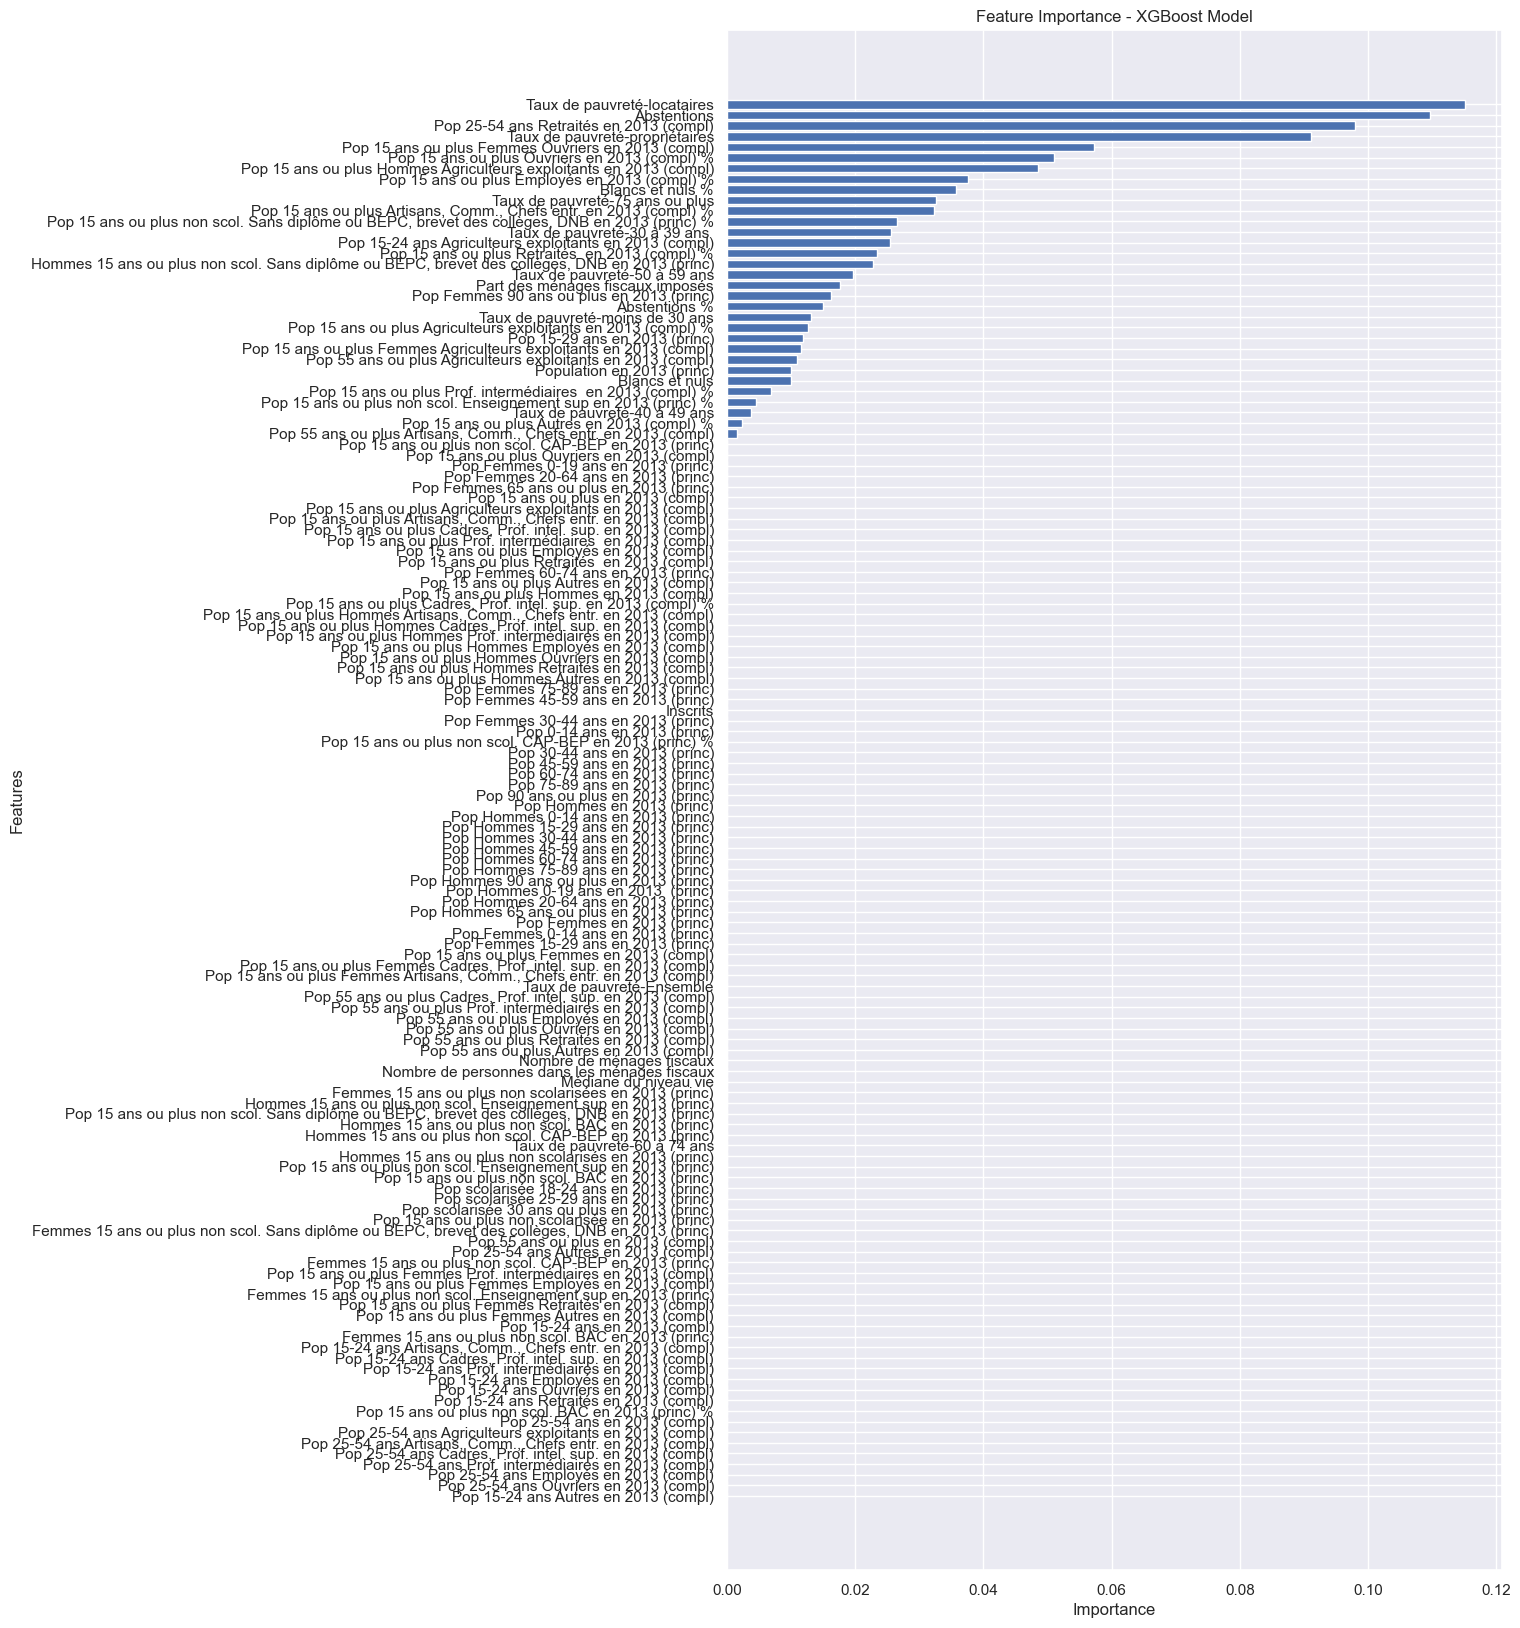

In [109]:
import matplotlib.pyplot as plt

# Get the feature importance from the XGBoost classifier
xgb_clf = classifiers['XGBoost']
feature_importances = xgb_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost Model')
plt.show()


In [112]:
feats = {}
for feature, importance in zip(features.columns, xgb_clf.feature_importances_):
    feats[feature] = importance 

    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(10)

Importance
Taux de pauvreté-locataires                           0.115184
Abstentions                                           0.109741
Pop 25-54 ans Retraités en 2013 (compl)               0.097940
Taux de pauvreté-propriétaires                        0.091093
Pop 15 ans ou plus Femmes Ouvriers en 2013 (compl)    0.057240
Pop 15 ans ou plus Ouvriers en 2013 (compl) %         0.050992
Pop 15 ans ou plus Hommes Agriculteurs exploita...    0.048545
Pop 15 ans ou plus Employés en 2013 (compl) %         0.037650
Blancs et nuls %                                      0.035682
Taux de pauvreté-75 ans ou plus                       0.032656

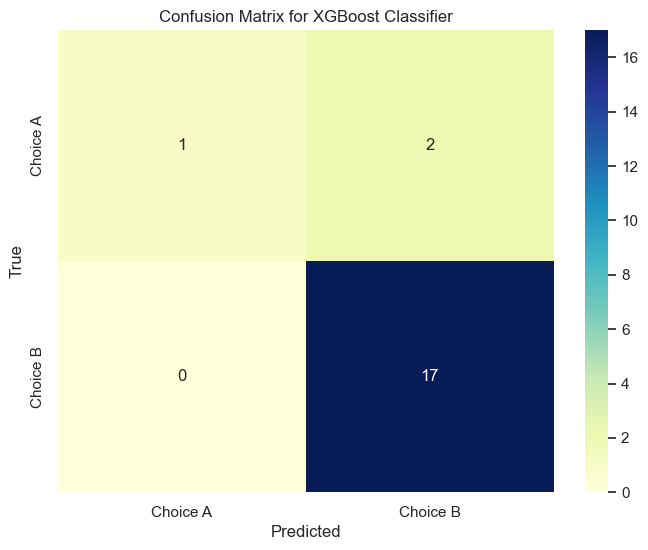

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = classifiers['XGBoost'].predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['Choice A', 'Choice B']

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Autres test

/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

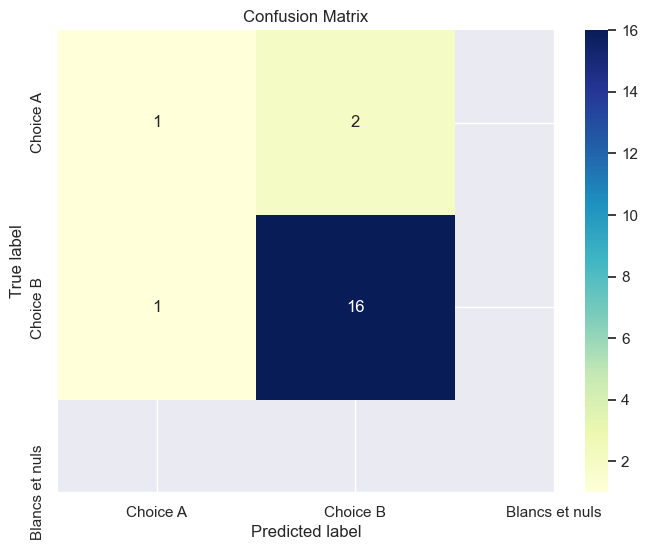

In [134]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


#Select features and target
features = df_final.drop(['Code du département','nom','geometry','Choix A', 'Choix B','Choix A %','Choix B %', 'Vote Category'], axis=1)
target = df_final['Vote Category']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

params_lr = {'C': [10**(i) for i in range(-4, 3)],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'penalty': ['l1', 'l2', 'elasticnet', 'none']}

clf_lr = LogisticRegression(random_state=42)
gridcv_lr = GridSearchCV(estimator=clf_lr, param_grid=params_lr)
gridcv_lr.fit(x_train_scaled, y_train)

best_model = gridcv_lr.best_estimator_

y_pred = best_model.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Choice A', 'Choice B', 'Blancs et nuls'], yticklabels=['Choice A', 'Choice B', 'Blancs et nuls'])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

In [135]:
# Train and evaluate classifiers

#clf_lr.fit(x_train_scaled, y_train)
#y_pred = clf_lr.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'{clf_lr} Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=le.classes_))

LogisticRegression(random_state=42) Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.50      0.33      0.40         3
     Choix B       0.89      0.94      0.91        17

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [24]:
true_classes = np.unique(y_test)
predicted_classes = np.unique(y_pred)

print("True classes:", true_classes)
print("Predicted classes:", predicted_classes)


True classes: [0 1 2]
Predicted classes: [0 1 2]


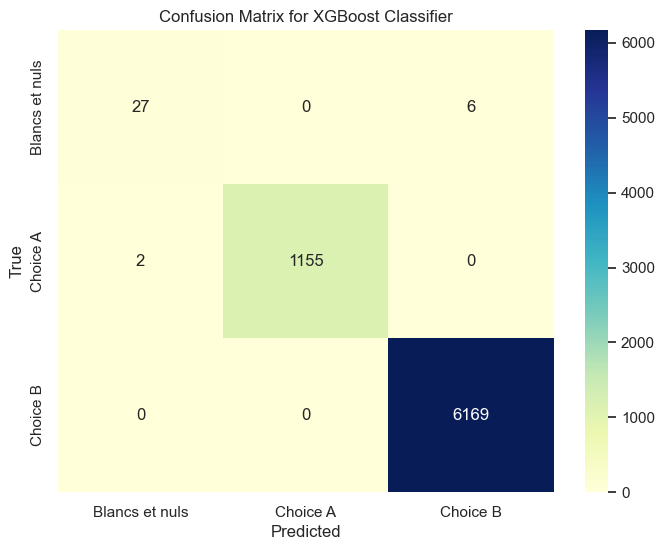

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = classifiers['XGBoost'].predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ['Blancs et nuls', 'Choice A', 'Choice B']

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [22]:
cm

array([[  19,    3,    4],
       [   3, 1166,    0],
       [   2,    1, 6161]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

y_pred = classifiers['XGBoost'].predict(x_test_scaled)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(classifiers['XGBoost'], x_test_scaled, y_test, ax=ax, cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix for XGBoost Classifier")
plt.show()


In [ ]:
#Pour prédire le résultat du vote à l'aide du classificateur XGBoost basé sur le code départemental, 
#vous devez d'abord agréger les données par code départemental et calculer les taux pour chaque département. 
#Ensuite, entraînez le classificateur XGBoost à l'aide des données agrégées et, enfin, 
#prédisez le résultat du vote pour un code de département donné. Voici comment procéder :

In [25]:
department_data = df.groupby('Code du département').agg({
    'Inscrits': 'sum',
    'Abstentions': 'sum',
    'Blancs et nuls': 'sum',
    'Choix A': 'sum',
    'Choix B': 'sum'
}).reset_index()

department_data['Abstention Rate'] = department_data['Abstentions'] / department_data['Inscrits']
department_data['Blancs Rate'] = department_data['Blancs et nuls'] / department_data['Inscrits']
department_data['Choice A Rate'] = department_data['Choix A'] / department_data['Inscrits']
department_data['Choice B Rate'] = department_data['Choix B'] / department_data['Inscrits']
department_data['Vote Category'] = department_data.apply(lambda row: 'Choice A' if row['Choix A'] > row['Choix B'] and row['Choix A'] > row['Blancs et nuls'] else 'Choice B' if row['Choix B'] > row['Choix A'] and row['Choix B'] > row['Blancs et nuls'] else 'Blancs et nuls', axis=1)


In [50]:
department_data.head()

Code du département  Inscrits  Abstentions  Blancs et nuls  Choix A  \
0                   1    393808        65996            6453   116379   
1                  10    203590        37939            3466    54743   
2                  11    264288        43641            4299   102595   
3                  12    218347        32095            4539    83404   
4                  13   1314766       257432           16711   428682   

   Choix B  Abstention Rate  Blancs Rate  Choice A Rate  Choice B Rate  \
0   204980         0.167584     0.016386       0.295522       0.520507   
1   107442         0.186350     0.017024       0.268888       0.527737   
2   113753         0.165127     0.016266       0.388194       0.430413   
3    98309         0.146991     0.020788       0.381979       0.450242   
4   611941         0.195801     0.012710       0.326052       0.465437   

  Vote Category  
0      Choice B  
1      Choice B  
2      Choice B  
3      Choice B  
4      Choice B

In [51]:
department_data['Code du département'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A',
       '2B', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '9', '90', '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC',
       'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
encoded_target = le.fit_transform(target)

x_train, x_test, y_train, y_test = train_test_split(features, encoded_target, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
def predict_vote_outcome(department_code):
    department_rates = department_data[department_data['Code du département'] == department_code][['Abstention Rate', 'Blancs Rate', 'Choice A Rate', 'Choice B Rate']]
    department_rates_scaled = scaler.transform(department_rates)
    vote_outcome = xgb_clf.predict(department_rates_scaled)
    return vote_outcome[0]


In [29]:
department_code = '75'  # Replace with the desired department code
predicted_outcome = predict_vote_outcome(department_code)
print(f"Predicted vote outcome for department {department_code}: {predicted_outcome}")


Predicted vote outcome for department 75: 0


In [30]:
department_code = '93'  # Replace with the desired department code
predicted_outcome = predict_vote_outcome(department_code)
print(f"Predicted vote outcome for department {department_code}: {predicted_outcome}")

Predicted vote outcome for department 93: 0


In [33]:
department_code = '10'  # Replace with the desired department code
predicted_outcome = predict_vote_outcome(department_code)
print(f"Predicted vote outcome for department {department_code}: {predicted_outcome}")

Predicted vote outcome for department 10: 1


In [35]:
department_code = '27'  # Replace with the desired department code
predicted_outcome = predict_vote_outcome(department_code)
print(f"Predicted vote outcome for department {department_code}: {predicted_outcome}")

Predicted vote outcome for department 27: 1


In [36]:
department_code = '60'  # Replace with the desired department code
predicted_outcome = predict_vote_outcome(department_code)
print(f"Predicted vote outcome for department {department_code}: {predicted_outcome}")

Predicted vote outcome for department 60: 1


In [37]:
department_code = '19'  # Replace with the desired department code
predicted_outcome = predict_vote_outcome(department_code)
print(f"Predicted vote outcome for department {department_code}: {predicted_outcome}")

Predicted vote outcome for department 19: 0


In [34]:
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(class_mapping)

{'Choice A': 0, 'Choice B': 1}


In [43]:
unique_classes_train = np.unique(y_train)
print("Unique classes in the training set:", unique_classes_train)


Unique classes in the training set: [0 1 2]


## Entrainements sur 4 modèles avec GridSearch

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

x_train, x_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

params_lr = {'C': [10**(i) for i in range(-4, 3)],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'penalty': ['l1', 'l2', 'elasticnet', 'none']}

params_rf = {'n_estimators': [10, 50, 100, 200],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

params_dt = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

params_xgb = {'n_estimators': [10, 50, 100, 200],
              'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'max_depth': [3, 4, 5, 6, 7]}

params_classifiers = {
    'Logistic Regression': (LogisticRegression(), params_lr),
    'Random Forest': (RandomForestClassifier(), params_rf),
    'Decision Tree': (DecisionTreeClassifier(), params_dt),
    'XGBoost': (XGBClassifier(), params_xgb)
}

# Train and evaluate classifiers using GridSearchCV
for clf_name, (clf, params) in params_classifiers.items():
    grid_search = GridSearchCV(clf, param_grid=params, cv=5)
    grid_search.fit(x_train_scaled, y_train)
    y_pred = grid_search.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print(f'Best parameters for {clf_name}: {grid_search.best_params_}')


/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Logistic Regression Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.50      0.33      0.40         3
     Choix B       0.89      0.94      0.91        17

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Random Forest Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.00      0.00      0.00         3
     Choix B       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Decision Tree Accuracy: 0.7000
              precision    recall  f1-score   support

     Choix A       0.20      0.33      0.25         3
     Choix B       0.87      0.76      0.81        17

    accuracy                           0.70        20
   macro avg       0.53      0.55      0.53        20
weighted avg       0.77      0.70      0.73        20

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
XGBoost Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.00      0.00      0.00         3
     Choix B       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [141]:
feats = {}
for feature, importance in zip(features.columns, best_xgb_model.feature_importances_):
    feats[feature] = importance 

    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(10)

Importance
Taux de pauvreté-propriétaires                        0.081132
Taux de pauvreté-75 ans ou plus                       0.079487
Pop 15 ans ou plus Prof. intermédiaires  en 201...    0.066059
Pop 15 ans ou plus non scol. Enseignement sup e...    0.065285
Pop 15 ans ou plus Artisans, Comm., Chefs entr....    0.053525
Pop 15 ans ou plus Employés en 2013 (compl) %         0.050755
Abstentions %                                         0.047375
Pop 15 ans ou plus Retraités  en 2013 (compl) %       0.044706
Pop 25-54 ans Retraités en 2013 (compl)               0.039804
Pop 15 ans ou plus Femmes Ouvriers en 2013 (compl)    0.038986

## Affichage des autres important features pour Decision Tree et RandomForest:

/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Logistic Regression Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.50      0.33      0.40         3
     Choix B       0.89      0.94      0.91        17

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Random Forest Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.00      0.00      0.00         3
     Choix B       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Decision Tree Accuracy: 0.9500
              precision    recall  f1-score   support

     Choix A       1.00      0.67      0.80         3
     Choix B       0.94      1.00      0.97        17

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
XGBoost Accuracy: 0.8500
              precision    recall  f1-score   support

     Choix A       0.00      0.00      0.00         3
     Choix B       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chmilew/miniconda3/envs/spyder2-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

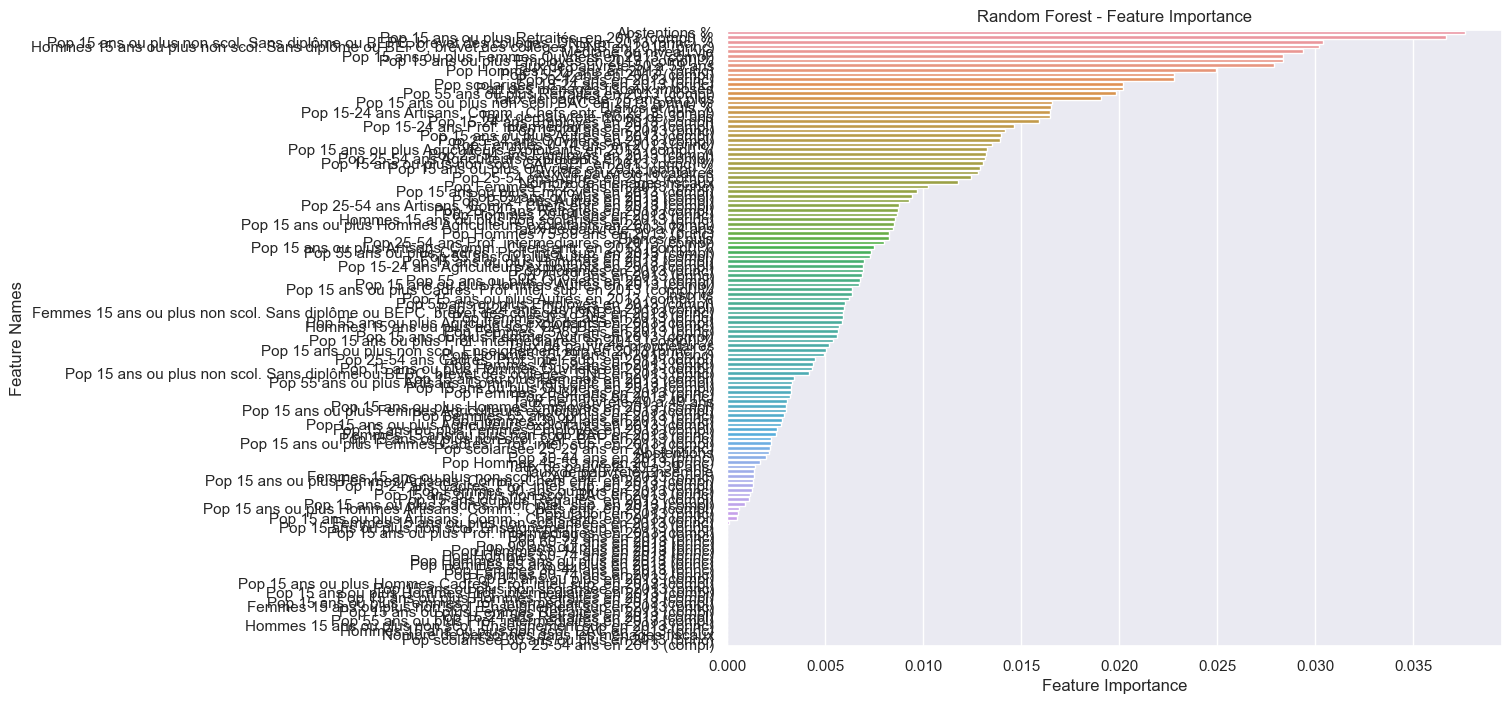

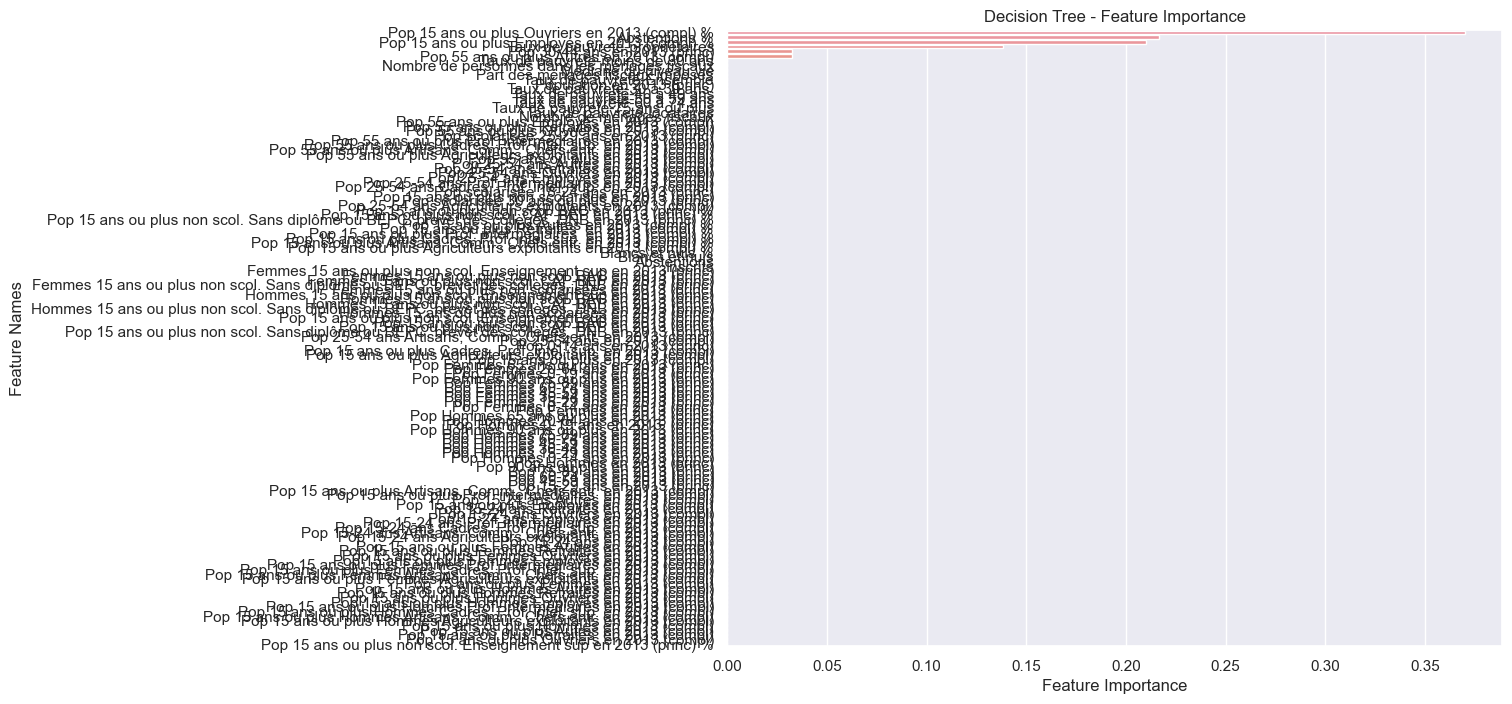

In [146]:
best_params = {}

for clf_name, (clf, params) in params_classifiers.items():
    grid_search = GridSearchCV(clf, param_grid=params, cv=5)
    grid_search.fit(x_train_scaled, y_train)
    y_pred = grid_search.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print(f'Best parameters for {clf_name}: {grid_search.best_params_}')
    best_params[clf_name] = grid_search.best_params_

    # Get the best Random Forest model from GridSearchCV
best_rf_model = params_classifiers['Random Forest'][0]
best_rf_model.set_params(**best_params['Random Forest'])

# Fit the best_rf_model on the training data
best_rf_model.fit(x_train_scaled, y_train)

# Plot feature importance for the Random Forest classifier
plot_feature_importance(best_rf_model.feature_importances_, features.columns, 'Random Forest')

# Get the best Decision Tree model from GridSearchCV
best_dt_model = params_classifiers['Decision Tree'][0]
best_dt_model.set_params(**best_params['Decision Tree'])

# Fit the best_dt_model on the training data
best_dt_model.fit(x_train_scaled, y_train)

# Plot feature importance for the Decision Tree classifier
plot_feature_importance(best_dt_model.feature_importances_, features.columns, 'Decision Tree')


## Affichage Feature Importance pour Decision Trees:

In [147]:
feats = {}
for feature, importance in zip(features.columns, best_dt_model.feature_importances_):
    feats[feature] = importance 

    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(10)

Importance
Pop 15 ans ou plus Ouvriers en 2013 (compl) %    0.370180
Abstentions %                                    0.216423
Pop 15 ans ou plus Employés en 2013 (compl) %    0.210141
Taux de pauvreté-propriétaires                   0.138188
Pop 30-44 ans en 2013 (princ)                    0.032534
Pop 55 ans ou plus Autres en 2013 (compl)        0.032534
Taux de pauvreté-moins de 30 ans                 0.000000
Nombre de personnes dans les ménages fiscaux     0.000000
Médiane du niveau vie                            0.000000
Part des ménages fiscaux imposés                 0.000000

## Affichage Feature Importance pour Random Forest:

In [148]:
feats = {}
for feature, importance in zip(features.columns, best_rf_model.feature_importances_):
    feats[feature] = importance 

    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(10)

Importance
Abstentions %                                         0.037663
Pop 15 ans ou plus Retraités  en 2013 (compl) %       0.036671
Pop 15 ans ou plus non scol. Sans diplôme ou BE...    0.030398
Hommes 15 ans ou plus non scol. Sans diplôme ou...    0.030201
Médiane du niveau vie                                 0.029397
Pop 15 ans ou plus Femmes Ouvriers en 2013 (compl)    0.028384
Pop 15 ans ou plus Employés en 2013 (compl) %         0.028367
Taux de pauvreté-50 à 59 ans                          0.027929
Pop Hommes 0-19 ans en 2013  (princ)                  0.024944
Pop 15-24 ans en 2013 (compl)                         0.022804